In [151]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r"C:\Users\rhari\OneDrive\Documents\MBA\capstone 2\Data.xlsx")

Data Check

In [3]:
df

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Salary,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Course(2nd_Highest_Education),Specialization(2nd_Highest_Education),Institute(2nd_Highest_Education)
0,Chennai,1983-07-02 00:00:00,Fresh Graduate-No Functional Area exp.,Other Fresh Grad,NaN,MCA- Fresher seeking a job in IT Sector.,".NET,ACCESS,ASCP, ASP,ASP.NET,BANKING, C#,C++,...",Rs. 3.0 lacs,3 Year(s),Others,Delhi/ NCR,MCA/PGDCA,Computers,Others,NaN,NaN,NaN
1,Chennai,1979-06-07 00:00:00,IT/Telecom - Software,"Database Administration (DBA), Quality Assuran...","Software Services, Internet/Dot com/ISP",Software Tester and developer,"ACCESS,APACHE,ASP, ASP.NET,B2B SOFTWARE,C++, D...",Rs. 3.4 lacs,3 Year(s) 7 Month(s),Others,No Preference,B.Sc,Maths,Delhi University,NaN,NaN,NaN
2,Chennai,2000-02-13 00:00:00,IT/Telecom - Hardware,H/W Installation/Maintenance,IT-Hardware/Networking,System Administrator,Hardware & Networking,Rs. 3.8 lacs,3 Year(s) 10 Month(s),"Middle - Manager, Assistant Manager",Delhi/ NCR,B.Com,Commerce Honors,Jiwaji University,B.Com,Other B.Com,Jiwaji University
3,Chennai,1980-09-14 00:00:00,NaN,Other Fresh Grad,NaN,"softwares/Business Development, 1-Year/Delhi","Engineering/Manufacturing,",Rs. 4.0 lacs,3 Year(s) 7 Month(s),Entry Level/Fresher,Delhi/ NCR,BE/B.Tech,Electronics/Telecommunication,Others,Diploma,Electronics/Telecommunication,Board of Technical Education
4,Chennai,1984-05-01 00:00:00,Banks/Insurance/Financial Services,Equity Analyst,Consumer Durables/FMCG,complated MBA/PGDM,"marketing, business development,creating new b...",Rs. 7.5 lacs,6 Year(s) 2 Month(s),Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,Marketing,Others,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907670,Kolkata,1987-08-29 00:00:00,Materials/Logistics/Supply Chain Mgmt/Procurement,Operations,Consumer Durables/FMCG,"B.A., Materials/Logistics/Supply Chain Managem...","Logistics/Transport/Supply, Supply Chain/Suppl...",INR: 5.00 lacs (PA),8 Years 7 Months,Entry Level/Fresher,Delhi,B.A.,Other B.A.,NaN,Others,Others,Others
907671,Vadodara,1983-03-08 00:00:00,IT/Telecom - Software,Engineering,IT-Software,Software Developer,"Asp.net,C,Java,Sql Server 2000",INR: 14.00 lacs (PA),7 Years 8 Months,"Junior - Executive, Assistant","Chandigarh,Delhi,Delhi,Faridabad,Ghaziabad,Gur...",MCA/PGDCA,Computers,Others,BE/B.Tech,Maths,Others
907672,Gurgaon,1968-08-15 00:00:00,"Export/Import, Finance",Customer Service (Web),"Export/Import/Merchandising, Financial Service...",M.I.B (Master Of International Business),MBA - International Bussiness,INR: 15.00 lacs (PA),8 Years 4 Months,Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,International Business,Others,B.Com,NaN,Ranchi University
907673,Ahmedabad,1983-12-23 00:00:00,IT/Telecom - Hardware,Electrical/Electronic,IT-Hardware/Networking,"for network-engineer ,desktop-support engineer...","MCSE , CCNA, MS-EXCHANGE , WI-FI",INR: 3.70 lacs (PA),6 Years 9 Months,Entry Level/Fresher,Delhi,Others,Information Technology,Others,Diploma,Information Technology,Others


In [4]:
df.shape

(907675, 17)

In [5]:
print(df.columns)

Index(['City', 'DOB', 'Functional_Area', 'Area_of_Specialization', 'Industry',
       'Resume_Title', 'Key_Skills', 'Salary', 'Work_Experience', 'Level',
       'Preferred_Location', 'Course(Highest_Education)',
       'Specialization(Highest_Education)', 'Institute(Highest_Education)',
       'Course(2nd_Highest_Education)',
       'Specialization(2nd_Highest_Education)',
       'Institute(2nd_Highest_Education)'],
      dtype='object')


In [6]:
df.describe()

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Salary,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Course(2nd_Highest_Education),Specialization(2nd_Highest_Education),Institute(2nd_Highest_Education)
count,906918,907675,903143,822749,871226,904539,822646,827739,898316,892002,907544,907545,896148,781378,702908,648467,613368
unique,4167,16894,5413,29547,7065,429072,450211,6489,1101,8,24217,37,172,192,37,169,156
top,Delhi,1984-05-01 00:00:00,IT/Telecom - Software,Others,Others,Resume,marketing,3.0 lacs,3 Years,"Junior - Executive, Assistant",Delhi,MBA/PGDM,Computers,Others,12th,Others,Others
freq,141744,3125,110437,33872,100202,14303,2118,12659,11356,264553,311116,149366,106242,336748,124797,107804,299099


In [7]:
# Count missing values per column
print(df.isnull().sum())

# Percentage of missing values
missing_percent = df.isnull().mean() * 100
print(missing_percent)


City                                        757
DOB                                           0
Functional_Area                            4532
Area_of_Specialization                    84926
Industry                                  36449
Resume_Title                               3136
Key_Skills                                85029
Salary                                    79936
Work_Experience                            9359
Level                                     15673
Preferred_Location                          131
Course(Highest_Education)                   130
Specialization(Highest_Education)         11527
Institute(Highest_Education)             126297
Course(2nd_Highest_Education)            204767
Specialization(2nd_Highest_Education)    259208
Institute(2nd_Highest_Education)         294307
dtype: int64
City                                      0.083400
DOB                                       0.000000
Functional_Area                           0.499298
Area_of_Specializa

Null Values need to be handled based on the percent of null values present and the importance of the feature

### Data Cleaning & Sanity Check

In [8]:
# Check for duplicate rows
print(df.duplicated().sum())

# Check data types
print(df.dtypes)

0
City                                     object
DOB                                      object
Functional_Area                          object
Area_of_Specialization                   object
Industry                                 object
Resume_Title                             object
Key_Skills                               object
Salary                                   object
Work_Experience                          object
Level                                    object
Preferred_Location                       object
Course(Highest_Education)                object
Specialization(Highest_Education)        object
Institute(Highest_Education)             object
Course(2nd_Highest_Education)            object
Specialization(2nd_Highest_Education)    object
Institute(2nd_Highest_Education)         object
dtype: object


All the columns are mapped as object data and needs to be correct as per the data type present

In [9]:
# converting dob to datetime
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')


In [10]:
print(df.dtypes)

City                                             object
DOB                                      datetime64[ns]
Functional_Area                                  object
Area_of_Specialization                           object
Industry                                         object
Resume_Title                                     object
Key_Skills                                       object
Salary                                           object
Work_Experience                                  object
Level                                            object
Preferred_Location                               object
Course(Highest_Education)                        object
Specialization(Highest_Education)                object
Institute(Highest_Education)                     object
Course(2nd_Highest_Education)                    object
Specialization(2nd_Highest_Education)            object
Institute(2nd_Highest_Education)                 object
dtype: object


In [11]:
# calculating age
today = pd.Timestamp.today()
df['Age'] = (today - df['DOB']).dt.days // 365

In [12]:
def parse_salary(s):
    if pd.isna(s):
        return np.nan
    s = str(s).lower()
    
    # Extract numeric part before 'lacs'
    match = re.search(r'(\d+\.?\d*)\s*lacs', s)
    if match:
        return float(match.group(1))  # Just return lakhs
    return np.nan

In [13]:
df["Salary_Cleaned"] = df["Salary"].apply(parse_salary)

In [14]:
df["Salary_Cleaned"]

0          3.0
1          3.4
2          3.8
3          4.0
4          7.5
          ... 
907670     5.0
907671    14.0
907672    15.0
907673     3.7
907674     3.5
Name: Salary_Cleaned, Length: 907675, dtype: float64

In [15]:
df

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Salary,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Course(2nd_Highest_Education),Specialization(2nd_Highest_Education),Institute(2nd_Highest_Education),Age,Salary_Cleaned
0,Chennai,1983-07-02,Fresh Graduate-No Functional Area exp.,Other Fresh Grad,NaN,MCA- Fresher seeking a job in IT Sector.,".NET,ACCESS,ASCP, ASP,ASP.NET,BANKING, C#,C++,...",Rs. 3.0 lacs,3 Year(s),Others,Delhi/ NCR,MCA/PGDCA,Computers,Others,NaN,NaN,NaN,42.0,3.0
1,Chennai,1979-06-07,IT/Telecom - Software,"Database Administration (DBA), Quality Assuran...","Software Services, Internet/Dot com/ISP",Software Tester and developer,"ACCESS,APACHE,ASP, ASP.NET,B2B SOFTWARE,C++, D...",Rs. 3.4 lacs,3 Year(s) 7 Month(s),Others,No Preference,B.Sc,Maths,Delhi University,NaN,NaN,NaN,46.0,3.4
2,Chennai,2000-02-13,IT/Telecom - Hardware,H/W Installation/Maintenance,IT-Hardware/Networking,System Administrator,Hardware & Networking,Rs. 3.8 lacs,3 Year(s) 10 Month(s),"Middle - Manager, Assistant Manager",Delhi/ NCR,B.Com,Commerce Honors,Jiwaji University,B.Com,Other B.Com,Jiwaji University,25.0,3.8
3,Chennai,1980-09-14,NaN,Other Fresh Grad,NaN,"softwares/Business Development, 1-Year/Delhi","Engineering/Manufacturing,",Rs. 4.0 lacs,3 Year(s) 7 Month(s),Entry Level/Fresher,Delhi/ NCR,BE/B.Tech,Electronics/Telecommunication,Others,Diploma,Electronics/Telecommunication,Board of Technical Education,44.0,4.0
4,Chennai,1984-05-01,Banks/Insurance/Financial Services,Equity Analyst,Consumer Durables/FMCG,complated MBA/PGDM,"marketing, business development,creating new b...",Rs. 7.5 lacs,6 Year(s) 2 Month(s),Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,Marketing,Others,NaN,NaN,NaN,41.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907670,Kolkata,1987-08-29,Materials/Logistics/Supply Chain Mgmt/Procurement,Operations,Consumer Durables/FMCG,"B.A., Materials/Logistics/Supply Chain Managem...","Logistics/Transport/Supply, Supply Chain/Suppl...",INR: 5.00 lacs (PA),8 Years 7 Months,Entry Level/Fresher,Delhi,B.A.,Other B.A.,NaN,Others,Others,Others,37.0,5.0
907671,Vadodara,1983-03-08,IT/Telecom - Software,Engineering,IT-Software,Software Developer,"Asp.net,C,Java,Sql Server 2000",INR: 14.00 lacs (PA),7 Years 8 Months,"Junior - Executive, Assistant","Chandigarh,Delhi,Delhi,Faridabad,Ghaziabad,Gur...",MCA/PGDCA,Computers,Others,BE/B.Tech,Maths,Others,42.0,14.0
907672,Gurgaon,1968-08-15,"Export/Import, Finance",Customer Service (Web),"Export/Import/Merchandising, Financial Service...",M.I.B (Master Of International Business),MBA - International Bussiness,INR: 15.00 lacs (PA),8 Years 4 Months,Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,International Business,Others,B.Com,NaN,Ranchi University,56.0,15.0
907673,Ahmedabad,1983-12-23,IT/Telecom - Hardware,Electrical/Electronic,IT-Hardware/Networking,"for network-engineer ,desktop-support engineer...","MCSE , CCNA, MS-EXCHANGE , WI-FI",INR: 3.70 lacs (PA),6 Years 9 Months,Entry Level/Fresher,Delhi,Others,Information Technology,Others,Diploma,Information Technology,Others,41.0,3.7


In [16]:
df["Work_Experience"].head(100)

0                3 Year(s) 
1      3 Year(s) 7 Month(s)
2     3 Year(s) 10 Month(s)
3      3 Year(s) 7 Month(s)
4      6 Year(s) 2 Month(s)
              ...          
95              22 Year(s) 
96     6 Year(s) 7 Month(s)
97               4 Year(s) 
98     3 Year(s) 6 Month(s)
99    10 Year(s) 5 Month(s)
Name: Work_Experience, Length: 100, dtype: object

In [17]:
def parse_experience(exp):
    if pd.isna(exp):
        return np.nan
    exp = str(exp).strip()
    
    # Extract years and months using regex
    year_match = re.search(r'(\d+)\s*Year', exp)
    month_match = re.search(r'(\d+)\s*Month', exp)
    
    years = int(year_match.group(1)) if year_match else 0
    months = int(month_match.group(1)) if month_match else 0

    # Convert months to fractional years
    return round(years + months / 12, 2)


In [18]:
df["Work_exp_Cleaned"] = df["Work_Experience"].apply(parse_experience)

In [19]:
df["Work_exp_Cleaned"]

0         3.00
1         3.58
2         3.83
3         3.58
4         6.17
          ... 
907670    8.58
907671    7.67
907672    8.33
907673    6.75
907674    5.67
Name: Work_exp_Cleaned, Length: 907675, dtype: float64

In [20]:
df

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Salary,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Course(2nd_Highest_Education),Specialization(2nd_Highest_Education),Institute(2nd_Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned
0,Chennai,1983-07-02,Fresh Graduate-No Functional Area exp.,Other Fresh Grad,NaN,MCA- Fresher seeking a job in IT Sector.,".NET,ACCESS,ASCP, ASP,ASP.NET,BANKING, C#,C++,...",Rs. 3.0 lacs,3 Year(s),Others,Delhi/ NCR,MCA/PGDCA,Computers,Others,NaN,NaN,NaN,42.0,3.0,3.00
1,Chennai,1979-06-07,IT/Telecom - Software,"Database Administration (DBA), Quality Assuran...","Software Services, Internet/Dot com/ISP",Software Tester and developer,"ACCESS,APACHE,ASP, ASP.NET,B2B SOFTWARE,C++, D...",Rs. 3.4 lacs,3 Year(s) 7 Month(s),Others,No Preference,B.Sc,Maths,Delhi University,NaN,NaN,NaN,46.0,3.4,3.58
2,Chennai,2000-02-13,IT/Telecom - Hardware,H/W Installation/Maintenance,IT-Hardware/Networking,System Administrator,Hardware & Networking,Rs. 3.8 lacs,3 Year(s) 10 Month(s),"Middle - Manager, Assistant Manager",Delhi/ NCR,B.Com,Commerce Honors,Jiwaji University,B.Com,Other B.Com,Jiwaji University,25.0,3.8,3.83
3,Chennai,1980-09-14,NaN,Other Fresh Grad,NaN,"softwares/Business Development, 1-Year/Delhi","Engineering/Manufacturing,",Rs. 4.0 lacs,3 Year(s) 7 Month(s),Entry Level/Fresher,Delhi/ NCR,BE/B.Tech,Electronics/Telecommunication,Others,Diploma,Electronics/Telecommunication,Board of Technical Education,44.0,4.0,3.58
4,Chennai,1984-05-01,Banks/Insurance/Financial Services,Equity Analyst,Consumer Durables/FMCG,complated MBA/PGDM,"marketing, business development,creating new b...",Rs. 7.5 lacs,6 Year(s) 2 Month(s),Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,Marketing,Others,NaN,NaN,NaN,41.0,7.5,6.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907670,Kolkata,1987-08-29,Materials/Logistics/Supply Chain Mgmt/Procurement,Operations,Consumer Durables/FMCG,"B.A., Materials/Logistics/Supply Chain Managem...","Logistics/Transport/Supply, Supply Chain/Suppl...",INR: 5.00 lacs (PA),8 Years 7 Months,Entry Level/Fresher,Delhi,B.A.,Other B.A.,NaN,Others,Others,Others,37.0,5.0,8.58
907671,Vadodara,1983-03-08,IT/Telecom - Software,Engineering,IT-Software,Software Developer,"Asp.net,C,Java,Sql Server 2000",INR: 14.00 lacs (PA),7 Years 8 Months,"Junior - Executive, Assistant","Chandigarh,Delhi,Delhi,Faridabad,Ghaziabad,Gur...",MCA/PGDCA,Computers,Others,BE/B.Tech,Maths,Others,42.0,14.0,7.67
907672,Gurgaon,1968-08-15,"Export/Import, Finance",Customer Service (Web),"Export/Import/Merchandising, Financial Service...",M.I.B (Master Of International Business),MBA - International Bussiness,INR: 15.00 lacs (PA),8 Years 4 Months,Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,International Business,Others,B.Com,NaN,Ranchi University,56.0,15.0,8.33
907673,Ahmedabad,1983-12-23,IT/Telecom - Hardware,Electrical/Electronic,IT-Hardware/Networking,"for network-engineer ,desktop-support engineer...","MCSE , CCNA, MS-EXCHANGE , WI-FI",INR: 3.70 lacs (PA),6 Years 9 Months,Entry Level/Fresher,Delhi,Others,Information Technology,Others,Diploma,Information Technology,Others,41.0,3.7,6.75


### Handling Null Values

In [21]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

City                                      0.083400
DOB                                       0.000881
Functional_Area                           0.499298
Area_of_Specialization                    9.356433
Industry                                  4.015644
Resume_Title                              0.345498
Key_Skills                                9.367780
Salary                                    8.806676
Work_Experience                           1.031096
Level                                     1.726719
Preferred_Location                        0.014432
Course(Highest_Education)                 0.014322
Specialization(Highest_Education)         1.269948
Institute(Highest_Education)             13.914342
Course(2nd_Highest_Education)            22.559506
Specialization(2nd_Highest_Education)    28.557358
Institute(2nd_Highest_Education)         32.424271
Age                                       0.000881
Salary_Cleaned                            8.806676
Work_exp_Cleaned               

#### Criteria for Null value handling : 
1. <5% : Impute the values or drop if needed
2. 5%-20% : Impute with feature specifc values or add category like "Missing"/ "Unknown"
2. greater than 20% : Drop if non-essential; otherwise use "N/A"/"Unknown" 

In [22]:
# dropping colmns with >20percent null values
cols_to_drop = ["Course(2nd_Highest_Education)","Specialization(2nd_Highest_Education)","Institute(2nd_Highest_Education)"]
df.drop(columns=cols_to_drop,inplace=True, axis=1)

In [23]:
df

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Salary,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned
0,Chennai,1983-07-02,Fresh Graduate-No Functional Area exp.,Other Fresh Grad,NaN,MCA- Fresher seeking a job in IT Sector.,".NET,ACCESS,ASCP, ASP,ASP.NET,BANKING, C#,C++,...",Rs. 3.0 lacs,3 Year(s),Others,Delhi/ NCR,MCA/PGDCA,Computers,Others,42.0,3.0,3.00
1,Chennai,1979-06-07,IT/Telecom - Software,"Database Administration (DBA), Quality Assuran...","Software Services, Internet/Dot com/ISP",Software Tester and developer,"ACCESS,APACHE,ASP, ASP.NET,B2B SOFTWARE,C++, D...",Rs. 3.4 lacs,3 Year(s) 7 Month(s),Others,No Preference,B.Sc,Maths,Delhi University,46.0,3.4,3.58
2,Chennai,2000-02-13,IT/Telecom - Hardware,H/W Installation/Maintenance,IT-Hardware/Networking,System Administrator,Hardware & Networking,Rs. 3.8 lacs,3 Year(s) 10 Month(s),"Middle - Manager, Assistant Manager",Delhi/ NCR,B.Com,Commerce Honors,Jiwaji University,25.0,3.8,3.83
3,Chennai,1980-09-14,NaN,Other Fresh Grad,NaN,"softwares/Business Development, 1-Year/Delhi","Engineering/Manufacturing,",Rs. 4.0 lacs,3 Year(s) 7 Month(s),Entry Level/Fresher,Delhi/ NCR,BE/B.Tech,Electronics/Telecommunication,Others,44.0,4.0,3.58
4,Chennai,1984-05-01,Banks/Insurance/Financial Services,Equity Analyst,Consumer Durables/FMCG,complated MBA/PGDM,"marketing, business development,creating new b...",Rs. 7.5 lacs,6 Year(s) 2 Month(s),Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,Marketing,Others,41.0,7.5,6.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907670,Kolkata,1987-08-29,Materials/Logistics/Supply Chain Mgmt/Procurement,Operations,Consumer Durables/FMCG,"B.A., Materials/Logistics/Supply Chain Managem...","Logistics/Transport/Supply, Supply Chain/Suppl...",INR: 5.00 lacs (PA),8 Years 7 Months,Entry Level/Fresher,Delhi,B.A.,Other B.A.,NaN,37.0,5.0,8.58
907671,Vadodara,1983-03-08,IT/Telecom - Software,Engineering,IT-Software,Software Developer,"Asp.net,C,Java,Sql Server 2000",INR: 14.00 lacs (PA),7 Years 8 Months,"Junior - Executive, Assistant","Chandigarh,Delhi,Delhi,Faridabad,Ghaziabad,Gur...",MCA/PGDCA,Computers,Others,42.0,14.0,7.67
907672,Gurgaon,1968-08-15,"Export/Import, Finance",Customer Service (Web),"Export/Import/Merchandising, Financial Service...",M.I.B (Master Of International Business),MBA - International Bussiness,INR: 15.00 lacs (PA),8 Years 4 Months,Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,International Business,Others,56.0,15.0,8.33
907673,Ahmedabad,1983-12-23,IT/Telecom - Hardware,Electrical/Electronic,IT-Hardware/Networking,"for network-engineer ,desktop-support engineer...","MCSE , CCNA, MS-EXCHANGE , WI-FI",INR: 3.70 lacs (PA),6 Years 9 Months,Entry Level/Fresher,Delhi,Others,Information Technology,Others,41.0,3.7,6.75


In [24]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

City                                  0.083400
DOB                                   0.000881
Functional_Area                       0.499298
Area_of_Specialization                9.356433
Industry                              4.015644
Resume_Title                          0.345498
Key_Skills                            9.367780
Salary                                8.806676
Work_Experience                       1.031096
Level                                 1.726719
Preferred_Location                    0.014432
Course(Highest_Education)             0.014322
Specialization(Highest_Education)     1.269948
Institute(Highest_Education)         13.914342
Age                                   0.000881
Salary_Cleaned                        8.806676
Work_exp_Cleaned                      1.031096
dtype: float64


In [25]:
df["Institute(Highest_Education)"] = df["Institute(Highest_Education)"].apply(
    lambda x: "Unknown" if x == 5.823689215512981e-293 else x
)

In [26]:
df[df["Institute(Highest_Education)"].isnull()]

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Salary,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned
22,Chennai,1978-04-13,Production/Manufacturing/Maintenance/Packaging,NaN,Manufacturing/Industrial,"Diploma, Production/Manufacturing/Maintenance,...","Motor,",Rs. 9.9 lacs,3 Year(s) 3 Month(s),"Junior - Executive, Assistant",Delhi,Diploma,Mechanical,NaN,47.0,9.90,3.25
86,Chennai,1983-04-29,Administration,NaN,Engineering/Projects,"BCA, Administration, 1-Year/Delhi","Plant/Facilities/Maintenance, Administration, ...",Rs. 6.5 lacs,7 Year(s) 8 Month(s),Entry Level/Fresher,Delhi,BCA,Other BCA,NaN,42.0,6.50,7.67
128,Chennai,1985-04-02,Engg. project Mgmt./site Engg./Civil Engg.,NaN,Engineering/Projects,"Engg. project Mgmt./site Engg./Civil Engg., 13...","Plant/Facilities/Maintenance, Production, Motor,",Rs. 4.2 lacs,5 Year(s) 1 Month(s),"Middle - Manager, Assistant Manager",Delhi,Others,Others,NaN,40.0,4.20,5.08
222,Chennai,1985-11-27,Fresh Graduate-No Functional Area exp.,NaN,Others,"B.A. , Fresh Graduate-No Functional Area exp. ...",Fresher,Rs. 11.1 lacs,8 Year(s),Entry Level/Fresher,Delhi,B.A.,NaN,NaN,39.0,11.10,8.00
230,Chennai,1975-05-28,Accounting/Tax/Company Secretary/Audit,"Other Accounting, Bookkeeping, Taxation, Audit...",Accounting-Tax/Consulting,"MBA/PGDM, M.Com, Accounting/Tax/Company Secret...","Accounts, Tally, Income-Tax, TDS, Internal Aud...",Rs. 4.5 lacs,7 Year(s) 5 Month(s),"Middle - Manager, Assistant Manager",Delhi,MBA/PGDM,Finance,NaN,50.0,4.50,7.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907659,Ghaziabad,1984-07-19,Advertising/PR/Events,NaN,Advertising/PR/Event Management,"Post Graduate Diploma, GRADUATION, Advertising...","Media, Reporter, Media/Print, Advertising/Medi...",INR: 28.00 lacs (PA),13 Years,"Junior - Executive, Assistant",Delhi,MA,Communication,NaN,41.0,28.00,13.00
907660,Ghaziabad,1974-06-21,Accounting/Tax/Company Secretary/Audit,NaN,Accounting-Tax/Consulting,"MBA/PGDM, B.Com, Accounting/Tax/Company Secret...","Commerce, Chartered Accountant/CA, : Accountan...",INR: 14.60 lacs (PA),11 Years 1 Month,"Junior - Executive, Assistant",Delhi,MBA/PGDM,Other Management,NaN,51.0,14.60,11.08
907665,Anand,1981-07-26,Sales/Business Development,NaN,Others,"B.A., Sales/Business Development, 1-Year/Delhi","Advertising/Media/Arts,",INR: 5.05 lacs (PA),11 Years,Entry Level/Fresher,Delhi,B.A.,Arts & Humanities,NaN,44.0,5.05,11.00
907666,Kolkata,1984-07-06,IT/Telecom - Software,"Product Development, Production Management, Pr...",Others,"MCA/PGDCA , IT-Software , 0 to 1 Years Experie...",computer skills,INR: 17.20 lacs (PA),33 Years,Entry Level/Fresher,Delhi,MCA/PGDCA,NaN,NaN,41.0,17.20,33.00


In [27]:
test = df

In [28]:
# dropping rows that have null in all the collumns as they provide no information respect to the cadidates specialization
# as their area of expertise, education and specialization training columns are expty 
cols =["Specialization(Highest_Education)", "Area_of_Specialization","Institute(Highest_Education)"]
df = df.dropna(subset=[
    "Specialization(Highest_Education)",
    "Area_of_Specialization",
    "Institute(Highest_Education)"
], how='all')

In [29]:
df[df["Institute(Highest_Education)"].isnull()]

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Salary,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned
22,Chennai,1978-04-13,Production/Manufacturing/Maintenance/Packaging,NaN,Manufacturing/Industrial,"Diploma, Production/Manufacturing/Maintenance,...","Motor,",Rs. 9.9 lacs,3 Year(s) 3 Month(s),"Junior - Executive, Assistant",Delhi,Diploma,Mechanical,NaN,47.0,9.90,3.25
86,Chennai,1983-04-29,Administration,NaN,Engineering/Projects,"BCA, Administration, 1-Year/Delhi","Plant/Facilities/Maintenance, Administration, ...",Rs. 6.5 lacs,7 Year(s) 8 Month(s),Entry Level/Fresher,Delhi,BCA,Other BCA,NaN,42.0,6.50,7.67
128,Chennai,1985-04-02,Engg. project Mgmt./site Engg./Civil Engg.,NaN,Engineering/Projects,"Engg. project Mgmt./site Engg./Civil Engg., 13...","Plant/Facilities/Maintenance, Production, Motor,",Rs. 4.2 lacs,5 Year(s) 1 Month(s),"Middle - Manager, Assistant Manager",Delhi,Others,Others,NaN,40.0,4.20,5.08
230,Chennai,1975-05-28,Accounting/Tax/Company Secretary/Audit,"Other Accounting, Bookkeeping, Taxation, Audit...",Accounting-Tax/Consulting,"MBA/PGDM, M.Com, Accounting/Tax/Company Secret...","Accounts, Tally, Income-Tax, TDS, Internal Aud...",Rs. 4.5 lacs,7 Year(s) 5 Month(s),"Middle - Manager, Assistant Manager",Delhi,MBA/PGDM,Finance,NaN,50.0,4.50,7.42
281,Chennai,1994-03-31,IT/Telecom - Software,NaN,IT-Software,"IT/Software, Delhi","MICROSOFT Technologies, LEGACY System, C++, LI...",Rs. 6.0 lacs,8 Year(s),Entry Level/Fresher,Delhi,Others,Others,NaN,31.0,6.00,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907659,Ghaziabad,1984-07-19,Advertising/PR/Events,NaN,Advertising/PR/Event Management,"Post Graduate Diploma, GRADUATION, Advertising...","Media, Reporter, Media/Print, Advertising/Medi...",INR: 28.00 lacs (PA),13 Years,"Junior - Executive, Assistant",Delhi,MA,Communication,NaN,41.0,28.00,13.00
907660,Ghaziabad,1974-06-21,Accounting/Tax/Company Secretary/Audit,NaN,Accounting-Tax/Consulting,"MBA/PGDM, B.Com, Accounting/Tax/Company Secret...","Commerce, Chartered Accountant/CA, : Accountan...",INR: 14.60 lacs (PA),11 Years 1 Month,"Junior - Executive, Assistant",Delhi,MBA/PGDM,Other Management,NaN,51.0,14.60,11.08
907665,Anand,1981-07-26,Sales/Business Development,NaN,Others,"B.A., Sales/Business Development, 1-Year/Delhi","Advertising/Media/Arts,",INR: 5.05 lacs (PA),11 Years,Entry Level/Fresher,Delhi,B.A.,Arts & Humanities,NaN,44.0,5.05,11.00
907666,Kolkata,1984-07-06,IT/Telecom - Software,"Product Development, Production Management, Pr...",Others,"MCA/PGDCA , IT-Software , 0 to 1 Years Experie...",computer skills,INR: 17.20 lacs (PA),33 Years,Entry Level/Fresher,Delhi,MCA/PGDCA,NaN,NaN,41.0,17.20,33.00


In [30]:
# Flling the remaining nulls in with category Others
df["Institute(Highest_Education)"] = df["Institute(Highest_Education)"].fillna("Others")

In [31]:
df

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Salary,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned
0,Chennai,1983-07-02,Fresh Graduate-No Functional Area exp.,Other Fresh Grad,NaN,MCA- Fresher seeking a job in IT Sector.,".NET,ACCESS,ASCP, ASP,ASP.NET,BANKING, C#,C++,...",Rs. 3.0 lacs,3 Year(s),Others,Delhi/ NCR,MCA/PGDCA,Computers,Others,42.0,3.0,3.00
1,Chennai,1979-06-07,IT/Telecom - Software,"Database Administration (DBA), Quality Assuran...","Software Services, Internet/Dot com/ISP",Software Tester and developer,"ACCESS,APACHE,ASP, ASP.NET,B2B SOFTWARE,C++, D...",Rs. 3.4 lacs,3 Year(s) 7 Month(s),Others,No Preference,B.Sc,Maths,Delhi University,46.0,3.4,3.58
2,Chennai,2000-02-13,IT/Telecom - Hardware,H/W Installation/Maintenance,IT-Hardware/Networking,System Administrator,Hardware & Networking,Rs. 3.8 lacs,3 Year(s) 10 Month(s),"Middle - Manager, Assistant Manager",Delhi/ NCR,B.Com,Commerce Honors,Jiwaji University,25.0,3.8,3.83
3,Chennai,1980-09-14,NaN,Other Fresh Grad,NaN,"softwares/Business Development, 1-Year/Delhi","Engineering/Manufacturing,",Rs. 4.0 lacs,3 Year(s) 7 Month(s),Entry Level/Fresher,Delhi/ NCR,BE/B.Tech,Electronics/Telecommunication,Others,44.0,4.0,3.58
4,Chennai,1984-05-01,Banks/Insurance/Financial Services,Equity Analyst,Consumer Durables/FMCG,complated MBA/PGDM,"marketing, business development,creating new b...",Rs. 7.5 lacs,6 Year(s) 2 Month(s),Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,Marketing,Others,41.0,7.5,6.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907670,Kolkata,1987-08-29,Materials/Logistics/Supply Chain Mgmt/Procurement,Operations,Consumer Durables/FMCG,"B.A., Materials/Logistics/Supply Chain Managem...","Logistics/Transport/Supply, Supply Chain/Suppl...",INR: 5.00 lacs (PA),8 Years 7 Months,Entry Level/Fresher,Delhi,B.A.,Other B.A.,Others,37.0,5.0,8.58
907671,Vadodara,1983-03-08,IT/Telecom - Software,Engineering,IT-Software,Software Developer,"Asp.net,C,Java,Sql Server 2000",INR: 14.00 lacs (PA),7 Years 8 Months,"Junior - Executive, Assistant","Chandigarh,Delhi,Delhi,Faridabad,Ghaziabad,Gur...",MCA/PGDCA,Computers,Others,42.0,14.0,7.67
907672,Gurgaon,1968-08-15,"Export/Import, Finance",Customer Service (Web),"Export/Import/Merchandising, Financial Service...",M.I.B (Master Of International Business),MBA - International Bussiness,INR: 15.00 lacs (PA),8 Years 4 Months,Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,International Business,Others,56.0,15.0,8.33
907673,Ahmedabad,1983-12-23,IT/Telecom - Hardware,Electrical/Electronic,IT-Hardware/Networking,"for network-engineer ,desktop-support engineer...","MCSE , CCNA, MS-EXCHANGE , WI-FI",INR: 3.70 lacs (PA),6 Years 9 Months,Entry Level/Fresher,Delhi,Others,Information Technology,Others,41.0,3.7,6.75


In [32]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

City                                 0.083525
DOB                                  0.000884
Functional_Area                      0.500485
Area_of_Specialization               9.100762
Industry                             4.018574
Resume_Title                         0.346362
Key_Skills                           9.362937
Salary                               8.825330
Work_Experience                      1.032789
Level                                1.731479
Preferred_Location                   0.014252
Course(Highest_Education)            0.012043
Specialization(Highest_Education)    0.991469
Institute(Highest_Education)         0.000000
Age                                  0.000884
Salary_Cleaned                       8.825330
Work_exp_Cleaned                     1.032789
dtype: float64


In [33]:
df["Area_of_Specialization"].unique()

array(['Other Fresh Grad',
       'Database Administration (DBA), Quality Assurance/Testing, Software Engineer',
       'H/W Installation/Maintenance', ...,
       'Market Research, Media Planning, Product /Brand Management',
       'EDP/MIS, Operations, Quality Assurance/Testing',
       'Accounting & Finance, Administration, Bookkeeping, Company Secretary'],
      dtype=object)

In [34]:
df[df["Area_of_Specialization"].isnull()]

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Salary,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned
22,Chennai,1978-04-13,Production/Manufacturing/Maintenance/Packaging,NaN,Manufacturing/Industrial,"Diploma, Production/Manufacturing/Maintenance,...","Motor,",Rs. 9.9 lacs,3 Year(s) 3 Month(s),"Junior - Executive, Assistant",Delhi,Diploma,Mechanical,Others,47.0,9.90,3.25
44,Chennai,1979-03-23,Fresh Graduate-No Functional Area exp.,NaN,NaN,B.tech/E.C./FRESHER,"c/c++,verilog/vhdl(structure,dataflow&behavior...",Rs. 10.05 lacs,9 Year(s) 10 Month(s),Entry Level/Fresher,"Delhi/ NCR,Gurgaon,Hyderabad/ Secunderabad",BE/B.Tech,Other BE/B.Tech,Others,46.0,10.05,9.83
86,Chennai,1983-04-29,Administration,NaN,Engineering/Projects,"BCA, Administration, 1-Year/Delhi","Plant/Facilities/Maintenance, Administration, ...",Rs. 6.5 lacs,7 Year(s) 8 Month(s),Entry Level/Fresher,Delhi,BCA,Other BCA,Others,42.0,6.50,7.67
128,Chennai,1985-04-02,Engg. project Mgmt./site Engg./Civil Engg.,NaN,Engineering/Projects,"Engg. project Mgmt./site Engg./Civil Engg., 13...","Plant/Facilities/Maintenance, Production, Motor,",Rs. 4.2 lacs,5 Year(s) 1 Month(s),"Middle - Manager, Assistant Manager",Delhi,Others,Others,Others,40.0,4.20,5.08
281,Chennai,1994-03-31,IT/Telecom - Software,NaN,IT-Software,"IT/Software, Delhi","MICROSOFT Technologies, LEGACY System, C++, LI...",Rs. 6.0 lacs,8 Year(s),Entry Level/Fresher,Delhi,Others,Others,Others,31.0,6.00,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907659,Ghaziabad,1984-07-19,Advertising/PR/Events,NaN,Advertising/PR/Event Management,"Post Graduate Diploma, GRADUATION, Advertising...","Media, Reporter, Media/Print, Advertising/Medi...",INR: 28.00 lacs (PA),13 Years,"Junior - Executive, Assistant",Delhi,MA,Communication,Others,41.0,28.00,13.00
907660,Ghaziabad,1974-06-21,Accounting/Tax/Company Secretary/Audit,NaN,Accounting-Tax/Consulting,"MBA/PGDM, B.Com, Accounting/Tax/Company Secret...","Commerce, Chartered Accountant/CA, : Accountan...",INR: 14.60 lacs (PA),11 Years 1 Month,"Junior - Executive, Assistant",Delhi,MBA/PGDM,Other Management,Others,51.0,14.60,11.08
907661,Vadodara,1987-07-30,Others,NaN,Apparel/Garments,FASHION DESIGNING,fashion designer/ marchentdiser,INR: 25.90 lacs (PA),17 Years 10 Months,Entry Level/Fresher,"Delhi,Faridabad,Ghaziabad,Gurgaon,Noida/ Great...",B.Sc,Biology,Others,37.0,25.90,17.83
907663,Kolkata,1980-04-04,"Banks/Insurance/Financial Services, Fresh Grad...",NaN,"Banking, Educational/Training",PGDBM Fresher with specialization in Marketing...,PGDBM Fresher,INR: 5.45 lacs (PA),9 Years,Entry Level/Fresher,"Delhi,Faridabad,Ghaziabad,Gurgaon,Noida/ Great...",MBA/PGDM,Marketing,Others,45.0,5.45,9.00


In [35]:
df["Area_of_Specialization"] = df["Area_of_Specialization"].fillna("Others")

In [36]:
df["Key_Skills"].unique()

array(['.NET,ACCESS,ASCP, ASP,ASP.NET,BANKING, C#,C++,FRONT-END,HTML, MS ASP,MS OFFICE,MS OFFICE 2003, MS SQL SERVER,OFFICE 2003,SOFTWARE TESTER,SQL, SQL SERVER,VISUAL STUDIO,XML',
       'ACCESS,APACHE,ASP, ASP.NET,B2B SOFTWARE,C++, DATABASE,DOS,ECLIPSE, ENGINEER,EXCEL,HTML, JAVA,MS ASP,ORACLE, PCI,PERFORMANCE TESTING,QA, QA TEST,REGRESSION TESTING,RETAIL, SALES,SOFTWARE ENGINEER,SOFTWARE ENGINEERING, SOFTWARE TESTING,SOLARI',
       'Hardware & Networking', ...,
       'donediplomainhotelmanagement from sams institute varanasi',
       'C++,C#,ASP.NET,XML', 'MBA(Finance&Marketing)'], dtype=object)

In [37]:
df[df["Key_Skills"].isnull()]

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Salary,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned
32,Chennai,1981-08-17,NaN,Production/Manufacturing/Maintenance,NaN,"Food Technologist, 6 years exp in food process...",NaN,Rs. 4.2 lacs,3 Year(s) 1 Month(s),"Junior - Executive, Assistant",Anywhere in North India,M.Sc,Food Technology,IGNOU,43.0,4.20,3.08
47,Chennai,1978-12-09,"Administration, Administration","Office Services, Office Services, Office Servi...","Advertising/PR/Event Management, Advertising/P...",PA/Office Assistant/Technician-Electrical,NaN,Rs. 6.3 lacs,5 Year(s) 2 Month(s),"Junior - Executive, Assistant","Lucknow,Lucknow",Diploma,Electrical,Board of Technical Education,46.0,6.30,5.17
54,Chennai,1986-02-27,Fresh Graduate-No Functional Area exp.,Information Systems,NGO/Social Services,MY C.V,NaN,Rs. 3.0 lacs,4 Year(s) 9 Month(s),Part time,Anywhere in North India,B.Sc,Maths,Lucknow University,39.0,3.00,4.75
132,Chennai,1981-05-19,Accounting/Tax/Company Secretary/Audit,"Taxation, Other Accounting",Accounting-Tax/Consulting,POST OF ACCOUNTANT,NaN,Rs. 13.0 lacs,6 Year(s) 6 Month(s),"Middle - Manager, Assistant Manager",Delhi,B.Com,Commerce Honors,Others,44.0,13.00,6.50
142,Chennai,1974-09-11,Marketing/MR/Media Planning,Marketing Strategy,Others,Nav,NaN,Rs. 4.5 lacs,6 Year(s) 7 Month(s),Entry Level/Fresher,Chandigarh,MBA/PGDM,Marketing,Others,50.0,4.50,6.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907640,Kolkata,1970-05-06,Finance,Environment,Banking,MBA FRESHERS FROM BANARAS HINDU UNIVERSITY LOO...,NaN,INR: 20.00 lacs (PA),14 Years 5 Months,Entry Level/Fresher,"Delhi,Faridabad,Ghaziabad,Gurgaon,Noida/ Great...",MBA/PGDM,Finance,Banaras Hindu University,55.0,20.00,14.42
907647,Pune,1990-04-21,Others,"Application Programming, System Analyst/Tech A...",Others,Fresher looking for computer operator job,NaN,INR: 6.60 lacs (PA),12 Years 11 Months,Entry Level/Fresher,Delhi,12th,Other 12th,Others,35.0,6.60,12.92
907654,Ahmedabad,1986-11-18,IT/Telecom - Hardware,"H/W Installation/Maintenance, Network Planning...",IT-Hardware/Networking,"BE/B.Tech, IT/Hardware, 1-Year/",NaN,INR: 5.25 lacs (PA),9 Years 4 Months,Entry Level/Fresher,Delhi,BE/B.Tech,Other BE/B.Tech,Others,38.0,5.25,9.33
907669,Vadodara,1986-05-27,Fresh Graduate-No Functional Area exp.,Graphic Designing/Animation/Web Designing,Others,anup (c.v.),NaN,INR: 16.65 lacs (PA),15 Years,Entry Level/Fresher,Delhi,B.Com,Commerce Pass,Delhi University,39.0,16.65,15.00


In [38]:
df["Key_Skills"] = df["Key_Skills"].fillna("Unknown")

In [39]:

df["Industry"].unique()

array([nan, 'Software Services, Internet/Dot com/ISP',
       'IT-Hardware/Networking', ...,
       'Defence, NGO/Social Services, Others',
       'Advertising/PR/Event Management, Consulting Services, Projects/Infrastructure/Power/Energy',
       'Government Sector, IT-Hardware/Networking, Logistics/Freight Forward/Distribution/Courier'],
      dtype=object)

In [40]:
df[df["Industry"].isnull()]

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Salary,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned
0,Chennai,1983-07-02,Fresh Graduate-No Functional Area exp.,Other Fresh Grad,NaN,MCA- Fresher seeking a job in IT Sector.,".NET,ACCESS,ASCP, ASP,ASP.NET,BANKING, C#,C++,...",Rs. 3.0 lacs,3 Year(s),Others,Delhi/ NCR,MCA/PGDCA,Computers,Others,42.0,3.00,3.00
3,Chennai,1980-09-14,NaN,Other Fresh Grad,NaN,"softwares/Business Development, 1-Year/Delhi","Engineering/Manufacturing,",Rs. 4.0 lacs,3 Year(s) 7 Month(s),Entry Level/Fresher,Delhi/ NCR,BE/B.Tech,Electronics/Telecommunication,Others,44.0,4.00,3.58
5,Chennai,1988-08-14,Fresh Graduate-No Functional Area exp.,"Customer Service, Operations, Sales",NaN,job for backend process in bpo sector,computer,Rs. 28.75 lacs,15 Year(s) 3 Month(s),Entry Level/Fresher,Anywhere in India,B.A.,Political Science,Others,36.0,28.75,15.25
18,Chennai,1982-08-15,Fresh Graduate-No Functional Area exp.,"Accounting & Finance, Customer Service, Marketing",NaN,for custumer care executive(voice or non-voice),"ms office, ms excel,ms-powepoint,ms-word,windo...",Rs. 15.0 lacs,31 Year(s) 8 Month(s),Others,Anywhere in India,B.Com,Commerce Pass,Delhi University,42.0,15.00,31.67
28,Chennai,1975-06-15,Fresh Graduate-No Functional Area exp.,Other Fresh Grad,NaN,degree in h.m,"BAKERY,BASIS,BILLING,",Rs. 6.0 lacs,20 Year(s),Others,"Delhi,Delhi/ NCR",BHM,Hotel Management,Rajasthan University,50.0,6.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907129,Kolkata,1980-10-21,Fresh Graduate-No Functional Area exp.,Risk/Credit/Economic Analyst,NaN,"BE/B.Tech , Fresh Graduate-No Functional Area ...",IT FRESHER,INR: 6.55 lacs (PA),4 Years 9 Months,Entry Level/Fresher,"Delhi,Faridabad,Ghaziabad,Gurgaon",BE/B.Tech,Computers,Others,44.0,6.55,4.75
907368,Rajkot,1987-08-21,Fresh Graduate-No Functional Area exp.,"Audit & Risk, Bookkeeping, Finance/Budgeting, ...",NaN,"MA , Fresh Graduate-No Functional Area exp. , ...",Unknown,INR: 12.00 lacs (PA),4 Years 4 Months,Entry Level/Fresher,Delhi,MA,Psychology,Others,37.0,12.00,4.33
907522,Kolkata,1982-08-03,Fresh Graduate-No Functional Area exp.,"Back-end/Transactions Processing, Logistics/Tr...",NaN,"B.Sc , Fresh Graduate-No Functional Area exp. ...",Unknown,INR: 14.25 lacs (PA),14 Years,Entry Level/Fresher,Delhi,B.Sc,Computers,Others,42.0,14.25,14.00
907529,Gurgaon,1982-05-01,Fresh Graduate-No Functional Area exp.,Other Fresh Grad,NaN,"MA , Fresh Graduate-No Functional Area exp. , ...",Fresher,INR: 7.20 lacs (PA),20 Years,Entry Level/Fresher,"Delhi,Noida/ Greater Noida,Faridabad,Gurgaon",MA,Arts & Humanities,Others,43.0,7.20,20.00


In [41]:
df["Industry"] = df["Industry"].fillna("Unknown")

In [42]:
# Imputing the below continuous columns with mean value

impute_mean_cols = ["Salary_Cleaned","Work_exp_Cleaned"]
for col in impute_mean_cols:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

In [43]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [44]:
impute_cols_mode = "Preferred_Location","Course(Highest_Education)","Specialization(Highest_Education)"
for col in impute_cols_mode:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [45]:
 df[df["Preferred_Location"].isnull()]

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Salary,Work_Experience,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned


In [46]:
impute_cols_mode = ["Resume_Title","Functional_Area","City"]
for col in impute_cols_mode:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [47]:
df["DOB"].fillna(df["DOB"].mean(), inplace=True)

In [48]:
df['Level'].fillna('Others', inplace=True)

 We have cleaned all the null values in the dataset - we will now drop the salary and work_experience collumns since we have the new cleaned and updated feature from the same created in the dataset.

In [49]:
df.drop(columns=['Salary', 'Work_Experience'], inplace=True)

In [50]:
df

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned
0,Chennai,1983-07-02,Fresh Graduate-No Functional Area exp.,Other Fresh Grad,Unknown,MCA- Fresher seeking a job in IT Sector.,".NET,ACCESS,ASCP, ASP,ASP.NET,BANKING, C#,C++,...",Others,Delhi/ NCR,MCA/PGDCA,Computers,Others,42.0,3.0,3.00
1,Chennai,1979-06-07,IT/Telecom - Software,"Database Administration (DBA), Quality Assuran...","Software Services, Internet/Dot com/ISP",Software Tester and developer,"ACCESS,APACHE,ASP, ASP.NET,B2B SOFTWARE,C++, D...",Others,No Preference,B.Sc,Maths,Delhi University,46.0,3.4,3.58
2,Chennai,2000-02-13,IT/Telecom - Hardware,H/W Installation/Maintenance,IT-Hardware/Networking,System Administrator,Hardware & Networking,"Middle - Manager, Assistant Manager",Delhi/ NCR,B.Com,Commerce Honors,Jiwaji University,25.0,3.8,3.83
3,Chennai,1980-09-14,IT/Telecom - Software,Other Fresh Grad,Unknown,"softwares/Business Development, 1-Year/Delhi","Engineering/Manufacturing,",Entry Level/Fresher,Delhi/ NCR,BE/B.Tech,Electronics/Telecommunication,Others,44.0,4.0,3.58
4,Chennai,1984-05-01,Banks/Insurance/Financial Services,Equity Analyst,Consumer Durables/FMCG,complated MBA/PGDM,"marketing, business development,creating new b...",Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,Marketing,Others,41.0,7.5,6.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907670,Kolkata,1987-08-29,Materials/Logistics/Supply Chain Mgmt/Procurement,Operations,Consumer Durables/FMCG,"B.A., Materials/Logistics/Supply Chain Managem...","Logistics/Transport/Supply, Supply Chain/Suppl...",Entry Level/Fresher,Delhi,B.A.,Other B.A.,Others,37.0,5.0,8.58
907671,Vadodara,1983-03-08,IT/Telecom - Software,Engineering,IT-Software,Software Developer,"Asp.net,C,Java,Sql Server 2000","Junior - Executive, Assistant","Chandigarh,Delhi,Delhi,Faridabad,Ghaziabad,Gur...",MCA/PGDCA,Computers,Others,42.0,14.0,7.67
907672,Gurgaon,1968-08-15,"Export/Import, Finance",Customer Service (Web),"Export/Import/Merchandising, Financial Service...",M.I.B (Master Of International Business),MBA - International Bussiness,Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,International Business,Others,56.0,15.0,8.33
907673,Ahmedabad,1983-12-23,IT/Telecom - Hardware,Electrical/Electronic,IT-Hardware/Networking,"for network-engineer ,desktop-support engineer...","MCSE , CCNA, MS-EXCHANGE , WI-FI",Entry Level/Fresher,Delhi,Others,Information Technology,Others,41.0,3.7,6.75


In [55]:
# Null Check
missing_percent = df.isnull().mean() * 100
print(missing_percent)

City                                 0.0
DOB                                  0.0
Functional_Area                      0.0
Area_of_Specialization               0.0
Industry                             0.0
Resume_Title                         0.0
Key_Skills                           0.0
Level                                0.0
Preferred_Location                   0.0
Course(Highest_Education)            0.0
Specialization(Highest_Education)    0.0
Institute(Highest_Education)         0.0
Age                                  0.0
Salary_Cleaned                       0.0
Work_exp_Cleaned                     0.0
dtype: float64


In [52]:
df.columns

Index(['City', 'DOB', 'Functional_Area', 'Area_of_Specialization', 'Industry',
       'Resume_Title', 'Key_Skills', 'Level', 'Preferred_Location',
       'Course(Highest_Education)', 'Specialization(Highest_Education)',
       'Institute(Highest_Education)', 'Age', 'Salary_Cleaned',
       'Work_exp_Cleaned'],
      dtype='object')

In [53]:
df.dtypes

City                                         object
DOB                                  datetime64[ns]
Functional_Area                              object
Area_of_Specialization                       object
Industry                                     object
Resume_Title                                 object
Key_Skills                                   object
Level                                        object
Preferred_Location                           object
Course(Highest_Education)                    object
Specialization(Highest_Education)            object
Institute(Highest_Education)                 object
Age                                         float64
Salary_Cleaned                              float64
Work_exp_Cleaned                            float64
dtype: object

In [56]:
# Cleaning and retaining only the target cities in the City Collumn

target_cities = [
    "Ahmedabad", "Bangalore", "Bangalore/Bengaluru", "Chennai", "Delhi",
    "Gurgaon", "Faridabad", "Kolkata", "Mumbai", "Hyderabad", "Jaipur",
    "Surat", "Kanpur", "Noida"
]
df['City'] = df['City'].str.strip()
df['City'] = df['City'].apply(lambda x: x if x in target_cities else 'Other')

In [57]:
print(df['City'].value_counts())


City
Other        391177
Delhi        142433
Kolkata      116821
Chennai       93915
Gurgaon       78193
Ahmedabad     36872
Jaipur        18347
Faridabad     11663
Surat          7612
Mumbai         5756
Kanpur         2331
Bangalore         2
Name: count, dtype: int64


### EDA

#### Univariate Analysis|

#### Continuous Columns

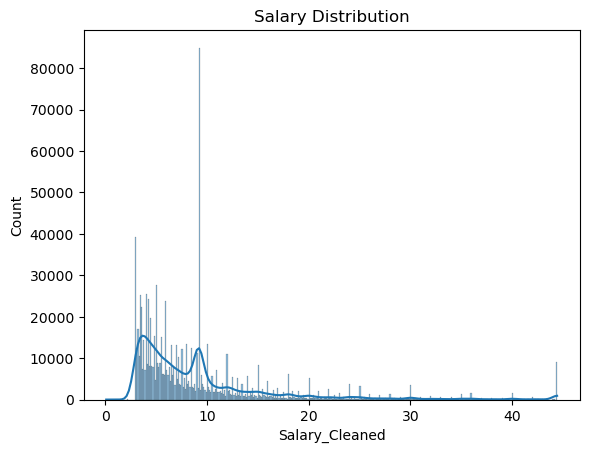

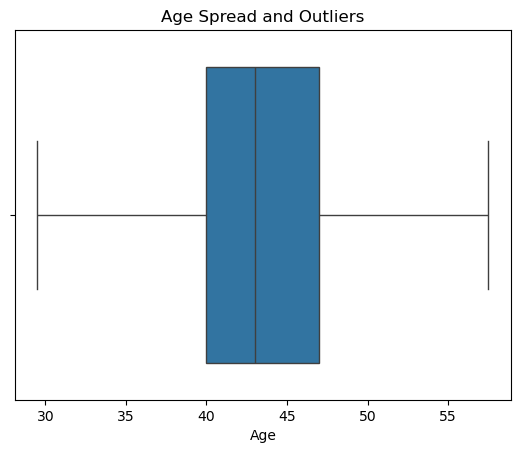

In [212]:
# Histogram & KDE for Salary_Cleaned
sns.histplot(df['Salary_Cleaned'], kde=True)
plt.title('Salary Distribution')
plt.show()

# Boxplot for Age
sns.boxplot(x=df['Age'])
plt.title('Age Spread and Outliers')
plt.show()

In [197]:
df.dtypes

City                                         object
DOB                                  datetime64[ns]
Functional_Area                              object
Area_of_Specialization                       object
Industry                                     object
Resume_Title                                 object
Key_Skills                                   object
Level                                        object
Preferred_Location                           object
Course(Highest_Education)                    object
Specialization(Highest_Education)            object
Institute(Highest_Education)                 object
Salary_Cleaned                              float64
Age                                         float64
Work_exp_Cleaned                            float64
dtype: object

In [199]:
# Since there are outliers in Age column - capping with IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values outside bounds
df['Age'] = df['Age'].clip(lower=lower_bound, upper=upper_bound)


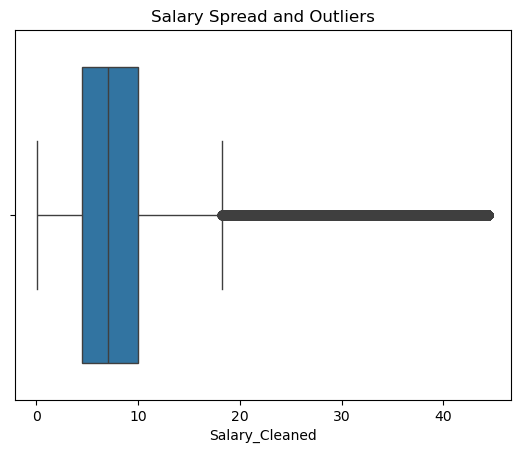

In [211]:
# Boxplot for Age
sns.boxplot(x=df['Salary_Cleaned'])
plt.title('Salary Spread and Outliers')
plt.show()

In [204]:
df["Salary_Cleaned"].describe()

count    905122.000000
mean          9.199414
std           8.218627
min           0.100000
25%           4.500000
50%           7.000000
75%          10.000000
max         144.000000
Name: Salary_Cleaned, dtype: float64

In [205]:
df['Salary_Cleaned'].quantile(0.99) 

44.429000000003725

In [209]:
# Since the 99th percentile seems to be reasonable value we will cap there
cap_val = df['Salary_Cleaned'].quantile(0.99)
df['Salary_Cleaned'] = df['Salary_Cleaned'].clip(upper=cap_val)

In [210]:
df

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Salary_Cleaned,Age,Work_exp_Cleaned
0,Chennai,1983-07-02,Fresh Graduate-No Functional Area exp.,Other Fresh Grad,Unknown,MCA- Fresher seeking a job in IT Sector.,".NET,ACCESS,ASCP, ASP,ASP.NET,BANKING, C#,C++,...",Others,Delhi/ NCR,MCA/PGDCA,Computers,Others,3.0,41.0,3.00
1,Chennai,1979-06-07,IT/Telecom - Software,"Database Administration (DBA), Quality Assuran...","Software Services, Internet/Dot com/ISP",Software Tester and developer,"ACCESS,APACHE,ASP, ASP.NET,B2B SOFTWARE,C++, D...",Others,No Preference,B.Sc,Maths,Delhi University,3.4,45.0,3.58
2,Chennai,2000-02-13,IT/Telecom - Hardware,H/W Installation/Maintenance,IT-Hardware/Networking,System Administrator,Hardware & Networking,"Middle - Manager, Assistant Manager",Delhi/ NCR,B.Com,Commerce Honors,Jiwaji University,3.8,29.5,3.83
3,Chennai,1980-09-14,IT/Telecom - Software,Other Fresh Grad,Unknown,"softwares/Business Development, 1-Year/Delhi","Engineering/Manufacturing,",Entry Level/Fresher,Delhi/ NCR,BE/B.Tech,Electronics/Telecommunication,Others,4.0,44.0,3.58
4,Chennai,1984-05-01,Banks/Insurance/Financial Services,Equity Analyst,Consumer Durables/FMCG,complated MBA/PGDM,"marketing, business development,creating new b...",Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,Marketing,Others,7.5,41.0,6.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907670,Kolkata,1987-08-29,Materials/Logistics/Supply Chain Mgmt/Procurement,Operations,Consumer Durables/FMCG,"B.A., Materials/Logistics/Supply Chain Managem...","Logistics/Transport/Supply, Supply Chain/Suppl...",Entry Level/Fresher,Delhi,B.A.,Other B.A.,Others,5.0,37.0,8.58
907671,Vadodara,1983-03-08,IT/Telecom - Software,Engineering,IT-Software,Software Developer,"Asp.net,C,Java,Sql Server 2000","Junior - Executive, Assistant","Chandigarh,Delhi,Delhi,Faridabad,Ghaziabad,Gur...",MCA/PGDCA,Computers,Others,14.0,42.0,7.67
907672,Gurgaon,1968-08-15,"Export/Import, Finance",Customer Service (Web),"Export/Import/Merchandising, Financial Service...",M.I.B (Master Of International Business),MBA - International Bussiness,Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,International Business,Others,15.0,56.0,8.33
907673,Ahmedabad,1983-12-23,IT/Telecom - Hardware,Electrical/Electronic,IT-Hardware/Networking,"for network-engineer ,desktop-support engineer...","MCSE , CCNA, MS-EXCHANGE , WI-FI",Entry Level/Fresher,Delhi,Others,Information Technology,Others,3.7,41.0,6.75


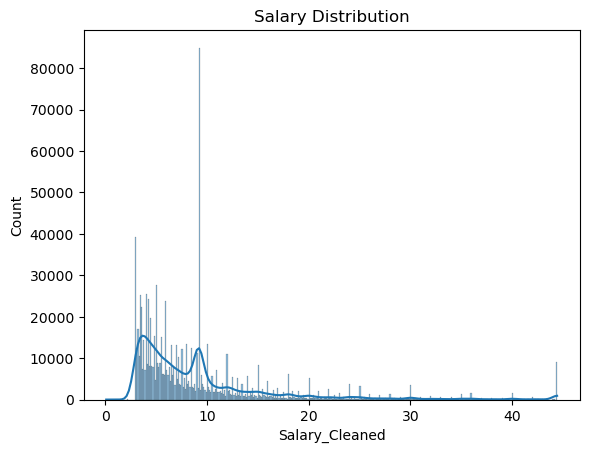

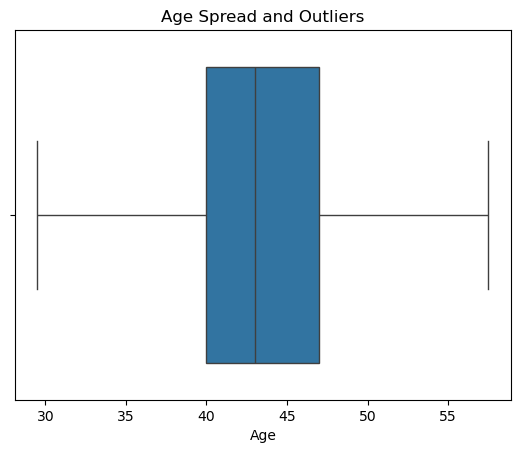

In [215]:
#Repolotting the graphs :

# Histogram & KDE for Salary_Cleaned
sns.histplot(df['Salary_Cleaned'], kde=True)
plt.title('Salary Distribution')
plt.show()

# Boxplot for Age
sns.boxplot(x=df['Age'])
plt.title('Age Spread and Outliers')
plt.show()

#### The age is kept at a realistic range of under 60 and we have allowed salary data spread to be within the 99th percentile in order to accomodate for the highly paid executives 

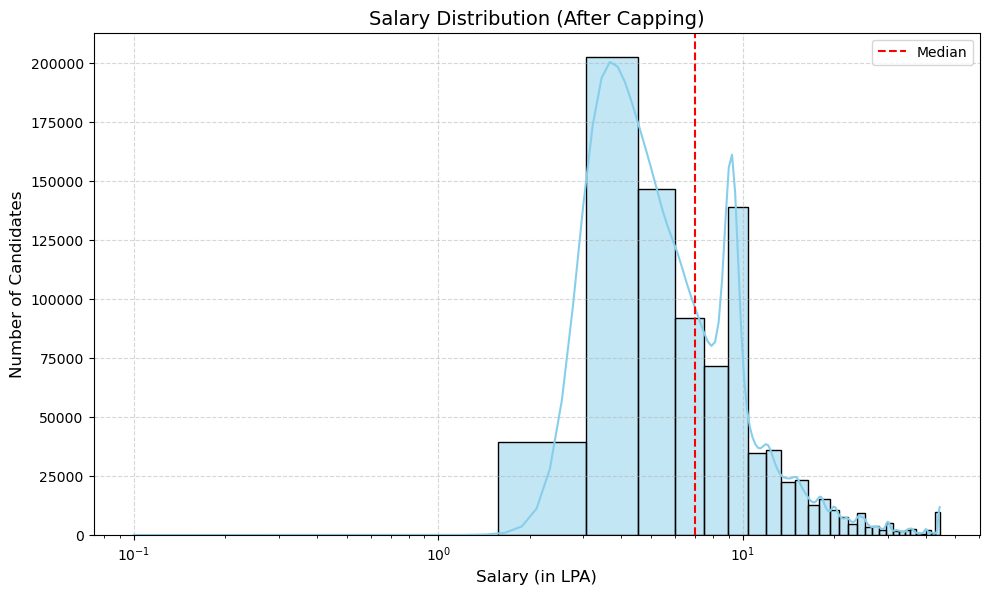

In [219]:
# Replotting Salary Distribution :
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary_Cleaned'], bins=30, kde=True, color='skyblue')

plt.title('Salary Distribution (After Capping)', fontsize=14)
plt.xlabel('Salary (in LPA)', fontsize=12)
plt.ylabel('Number of Candidates', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xscale('log')
plt.axvline(df['Salary_Cleaned'].median(), color='red', linestyle='--', label='Median')
plt.legend()
plt.show()


Applied log transaformation to the Salry column since it was heavily right skewed.

#### Categorical Columns : 
##### In order to identify dominant categories and detect imbalances in each categorical column we will now create bar plots of categorical columns

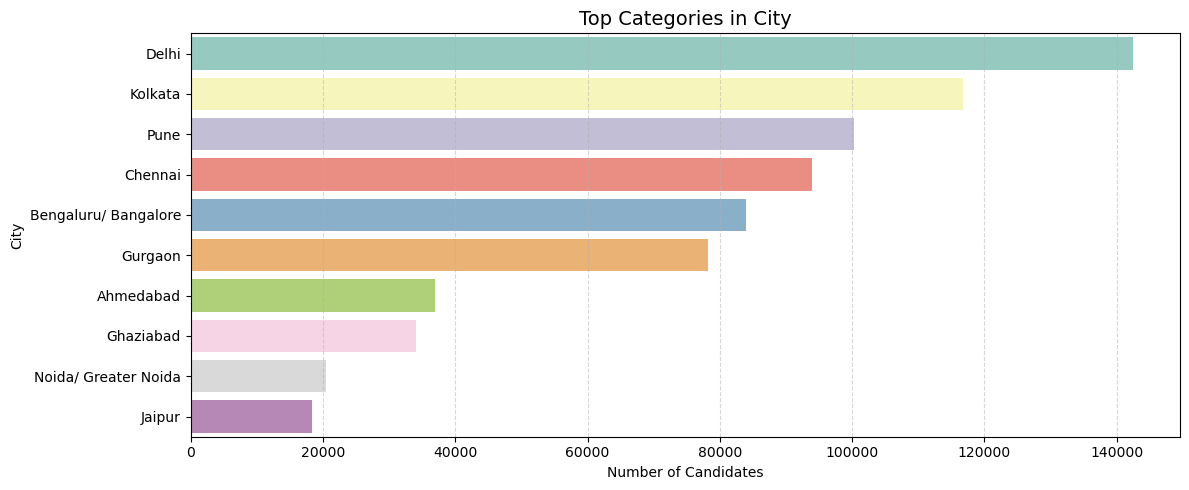

<Figure size 640x480 with 0 Axes>

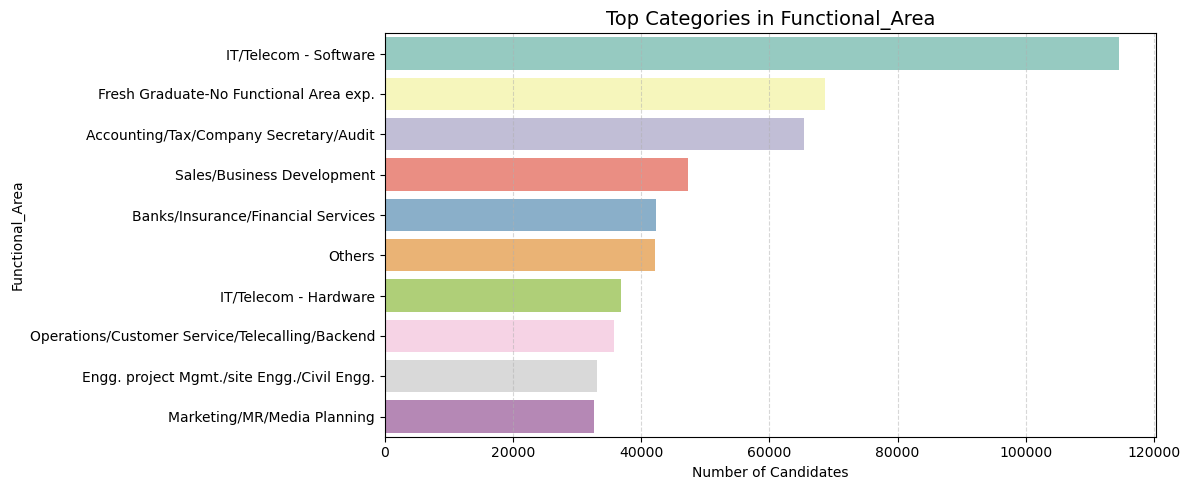

<Figure size 640x480 with 0 Axes>

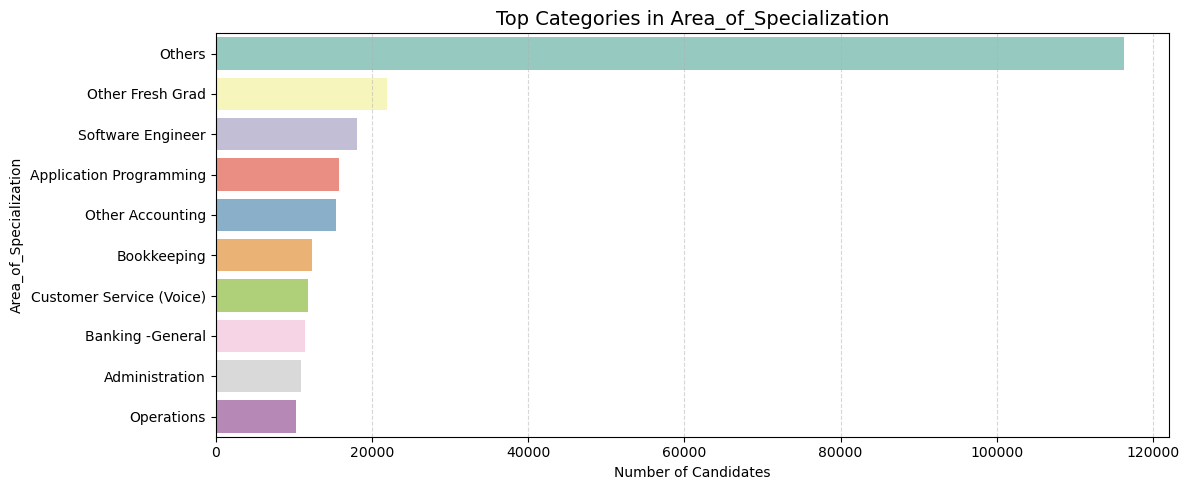

<Figure size 640x480 with 0 Axes>

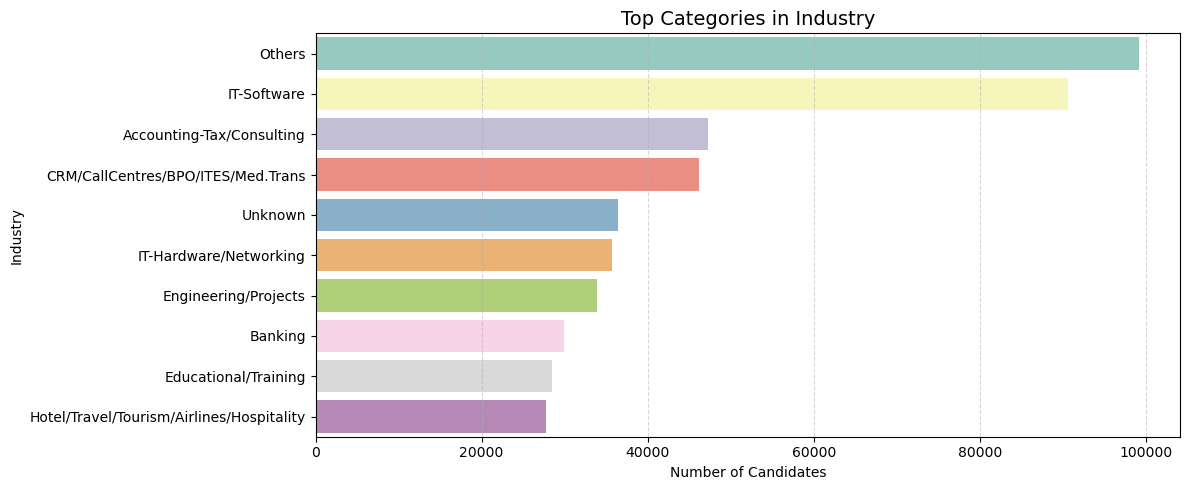

<Figure size 640x480 with 0 Axes>

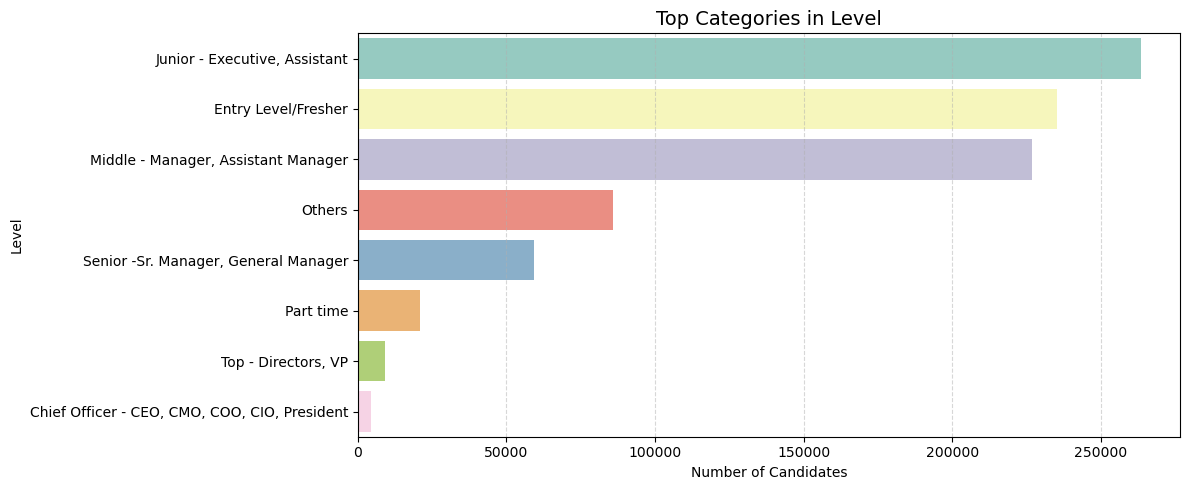

<Figure size 640x480 with 0 Axes>

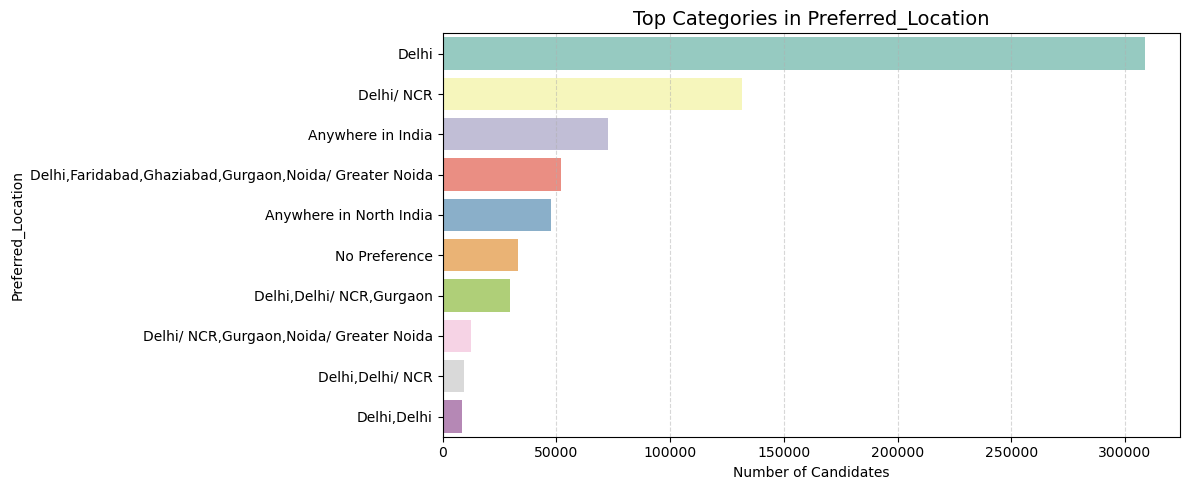

<Figure size 640x480 with 0 Axes>

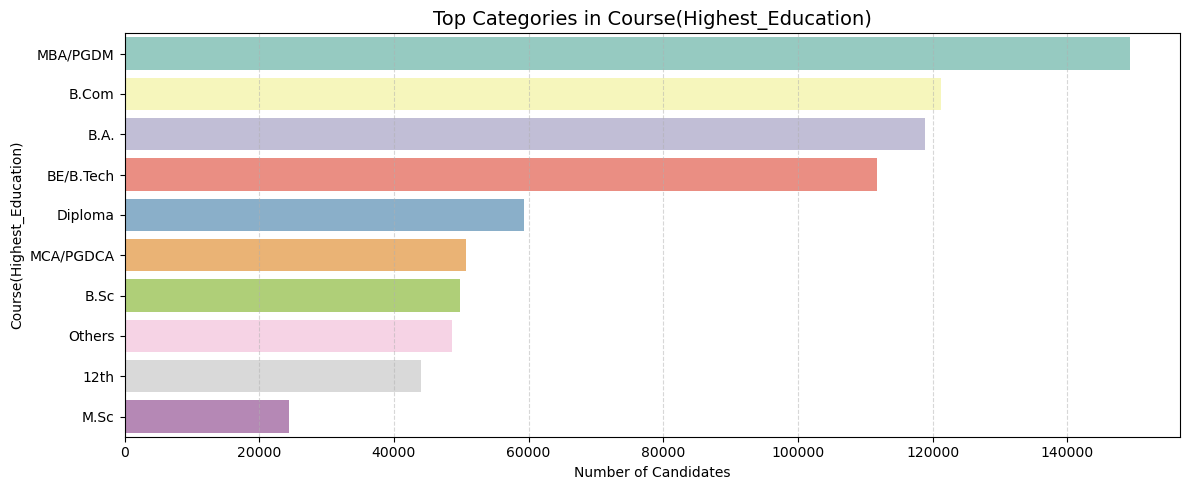

<Figure size 640x480 with 0 Axes>

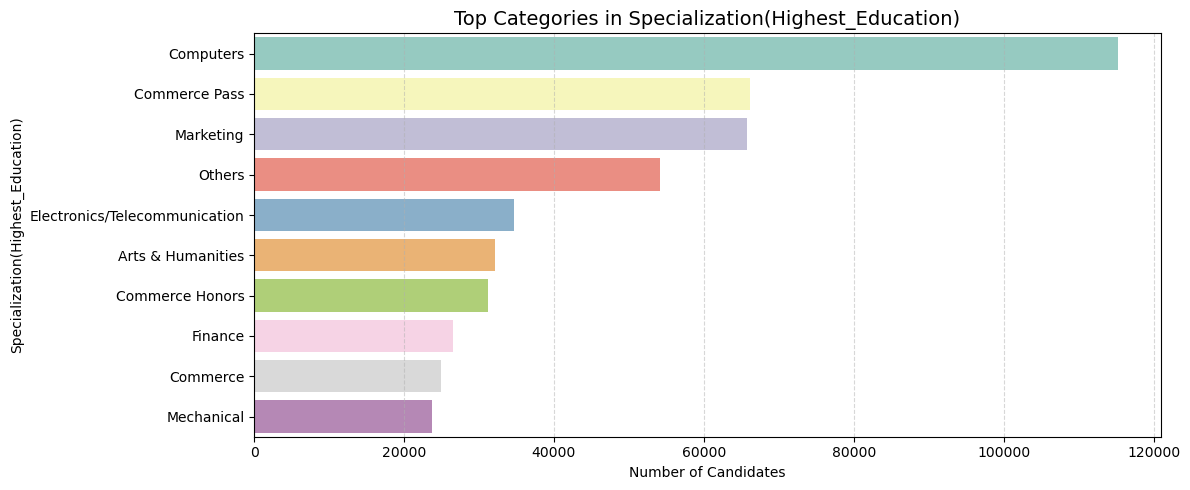

<Figure size 640x480 with 0 Axes>

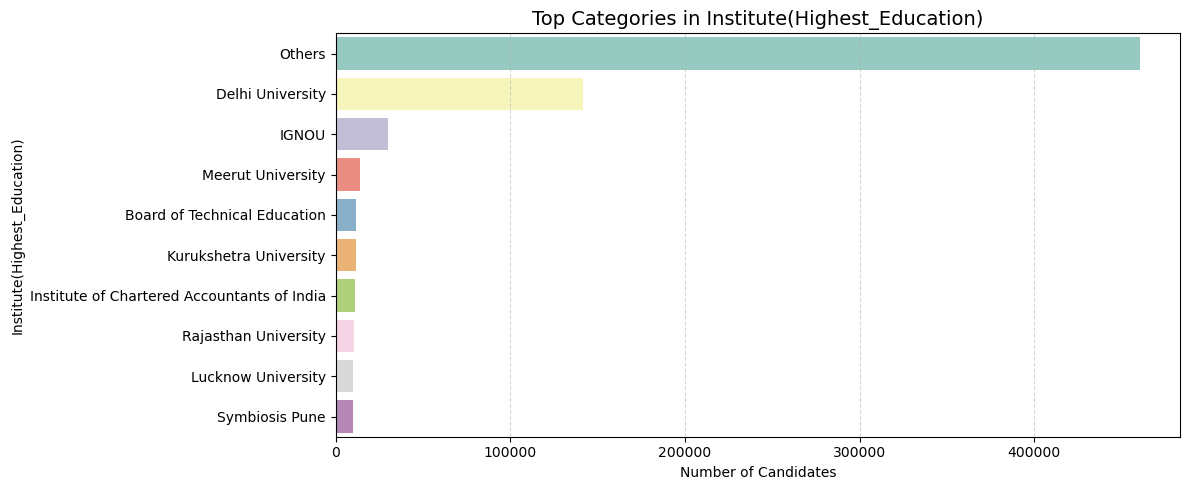

<Figure size 640x480 with 0 Axes>

In [221]:
categorical_cols = [
    'City', 'Functional_Area', 'Area_of_Specialization', 'Industry',
    'Level', 'Preferred_Location', 'Course(Highest_Education)',
    'Specialization(Highest_Education)', 'Institute(Highest_Education)'
]

for col in categorical_cols:
    plt.figure(figsize=(12, 5))
    top_vals = df[col].value_counts().head(10)  # Show top 10 only
    sns.barplot(x=top_vals.values, y=top_vals.index, palette='Set3')
    plt.title(f'Top Categories in {col}', fontsize=14)
    plt.xlabel('Number of Candidates')
    plt.ylabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



In [222]:
for col in categorical_cols:
    print(f"\nTop 3 categories in {col}:")
    print(df[col].value_counts().head(3))


Top 3 categories in City:
City
Delhi      142433
Kolkata    116821
Pune       100237
Name: count, dtype: int64

Top 3 categories in Functional_Area:
Functional_Area
IT/Telecom - Software                     114614
Fresh Graduate-No Functional Area exp.     68634
Accounting/Tax/Company Secretary/Audit     65436
Name: count, dtype: int64

Top 3 categories in Area_of_Specialization:
Area_of_Specialization
Others               116245
Other Fresh Grad      21960
Software Engineer     18032
Name: count, dtype: int64

Top 3 categories in Industry:
Industry
Others                       99129
IT-Software                  90642
Accounting-Tax/Consulting    47212
Name: count, dtype: int64

Top 3 categories in Level:
Level
Junior - Executive, Assistant          263403
Entry Level/Fresher                    235140
Middle - Manager, Assistant Manager    226799
Name: count, dtype: int64

Top 3 categories in Preferred_Location:
Preferred_Location
Delhi                308766
Delhi/ NCR           13181

In [223]:
### Checking for Class imbalances in categorical columns by analysing the distribution amongst the top 5 classes:
for col in categorical_cols:
    print(f"\nColumn: {col}")
    percent_counts = df[col].value_counts(normalize=True) * 100
    print(percent_counts.head(5).round(2))
    dominant = percent_counts.iloc[0]
    
    if dominant > 70:
        print(f"Class Imbalance Detected: '{percent_counts.index[0]}' makes up {dominant:.1f}% of {col}")
    else:
        print("No major class imbalance.")



Column: City
City
Delhi                   15.74
Kolkata                 12.91
Pune                    11.07
Chennai                 10.38
Bengaluru/ Bangalore     9.27
Name: proportion, dtype: float64
No major class imbalance.

Column: Functional_Area
Functional_Area
IT/Telecom - Software                     12.66
Fresh Graduate-No Functional Area exp.     7.58
Accounting/Tax/Company Secretary/Audit     7.23
Sales/Business Development                 5.22
Banks/Insurance/Financial Services         4.67
Name: proportion, dtype: float64
No major class imbalance.

Column: Area_of_Specialization
Area_of_Specialization
Others                     12.84
Other Fresh Grad            2.43
Software Engineer           1.99
Application Programming     1.74
Other Accounting            1.70
Name: proportion, dtype: float64
No major class imbalance.

Column: Industry
Industry
Others                                10.95
IT-Software                           10.01
Accounting-Tax/Consulting             

### Bivariate Analysis

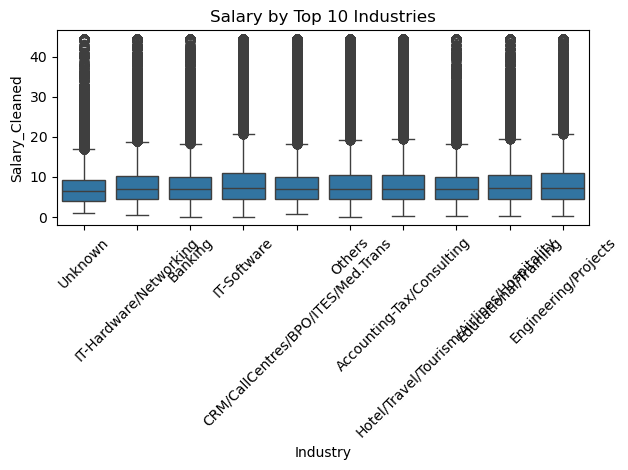

In [226]:
top_industries = df['Industry'].value_counts().nlargest(10).index
filtered_df = df[df['Industry'].isin(top_industries)]

sns.boxplot(data=filtered_df, x='Industry', y='Salary_Cleaned')
plt.title('Salary by Top 10 Industries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



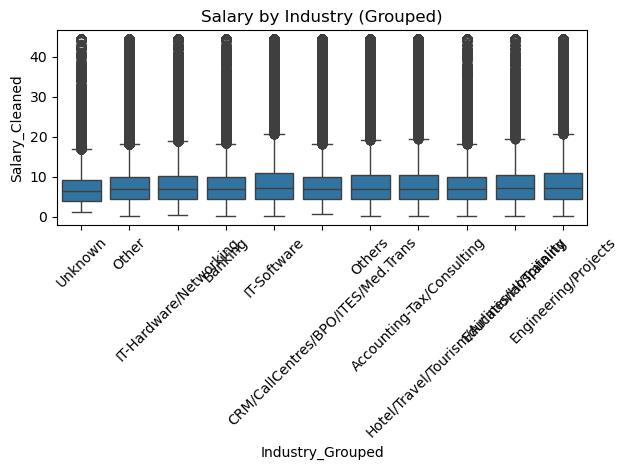

In [227]:
# Grouping rare categories into Other in Industry
top_n = 10
df['Industry_Grouped'] = df['Industry'].where(df['Industry'].isin(
    df['Industry'].value_counts().nlargest(top_n).index), 'Other')

sns.boxplot(data=df, x='Industry_Grouped', y='Salary_Cleaned')
plt.title('Salary by Industry (Grouped)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


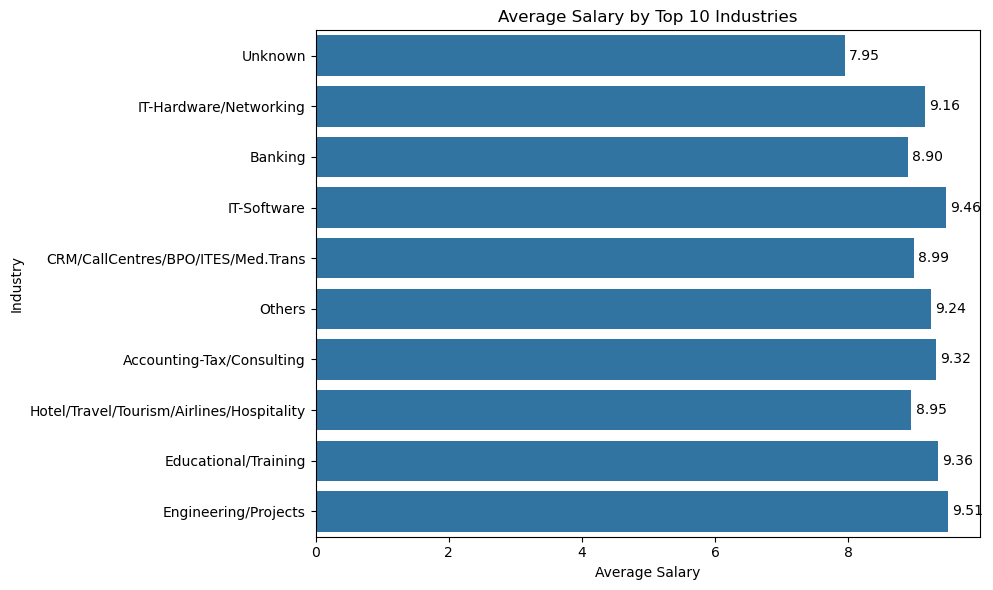

In [229]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=filtered_df, y='Industry', x='Salary_Cleaned', estimator='mean', ci=None)

plt.title('Average Salary by Top 10 Industries')
plt.xlabel('Average Salary')
plt.ylabel('Industry')
plt.tight_layout()

# Add text labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()


##### Engineering Project industry has the highest average salary.

### Salary vs Categorical Variabels

In [230]:
def salary_vs_category_barplot(df, column, top_n=10):
    # Filter to top N categories
    top_categories = df[column].value_counts().nlargest(top_n).index
    filtered_df = df[df[column].isin(top_categories)]

    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=filtered_df, y=column, x='Salary_Cleaned', estimator='mean', ci=None)
    plt.title(f'Average Salary by Top {top_n} {column}')
    plt.xlabel('Average Salary')
    plt.ylabel(column)
    plt.tight_layout()

    # Add labels to bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

    plt.show()

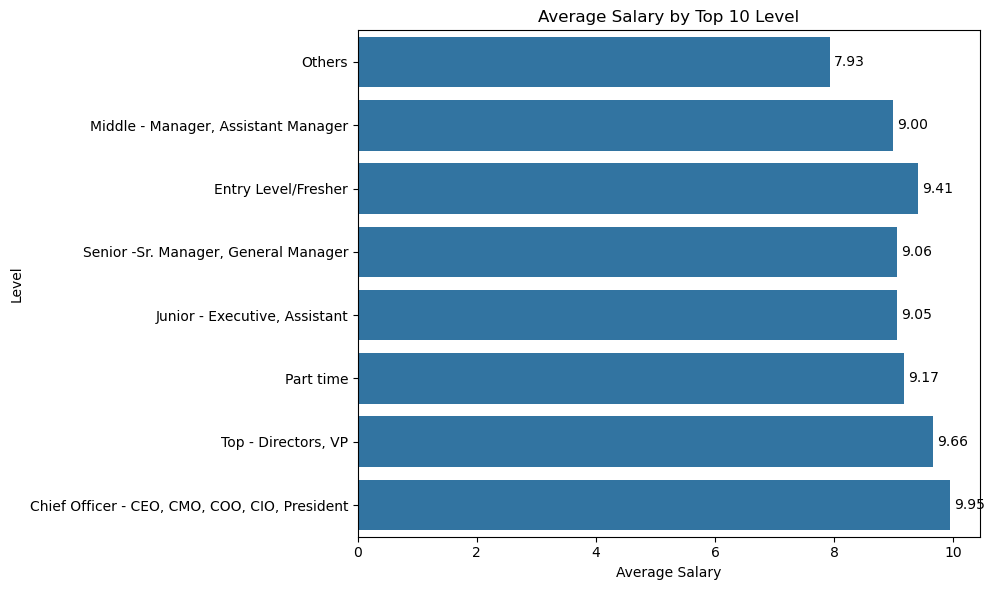

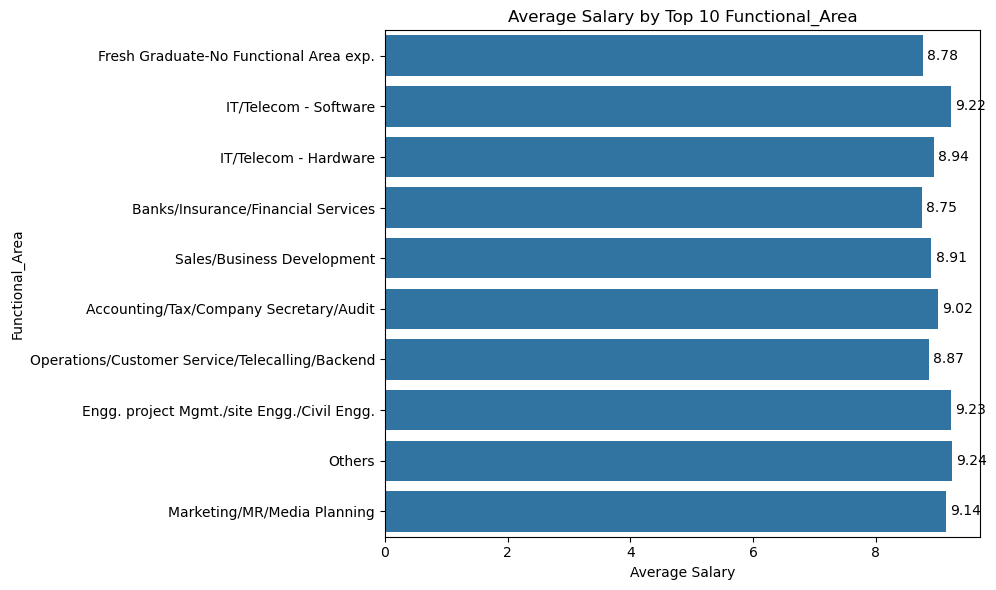

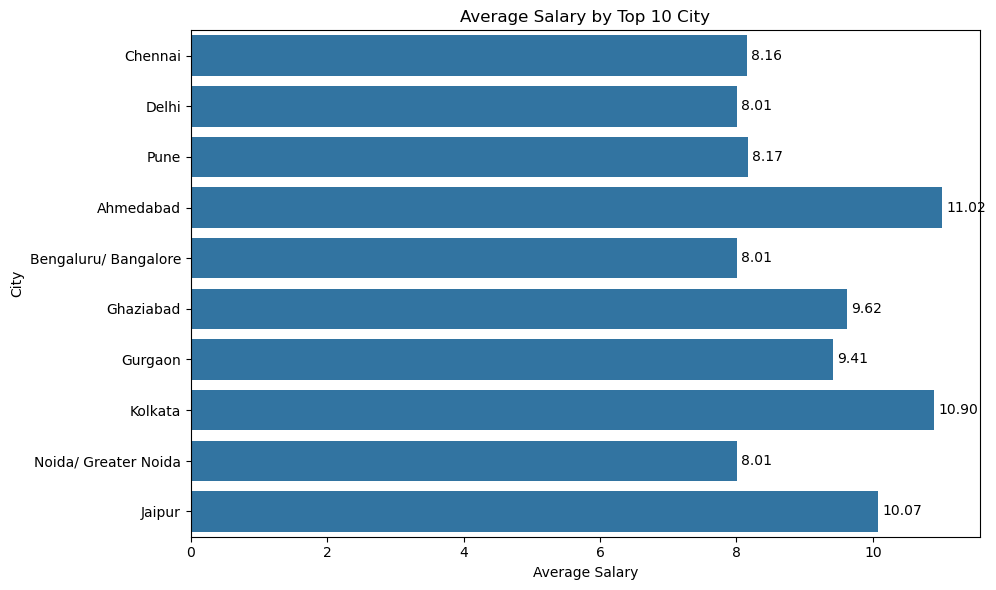

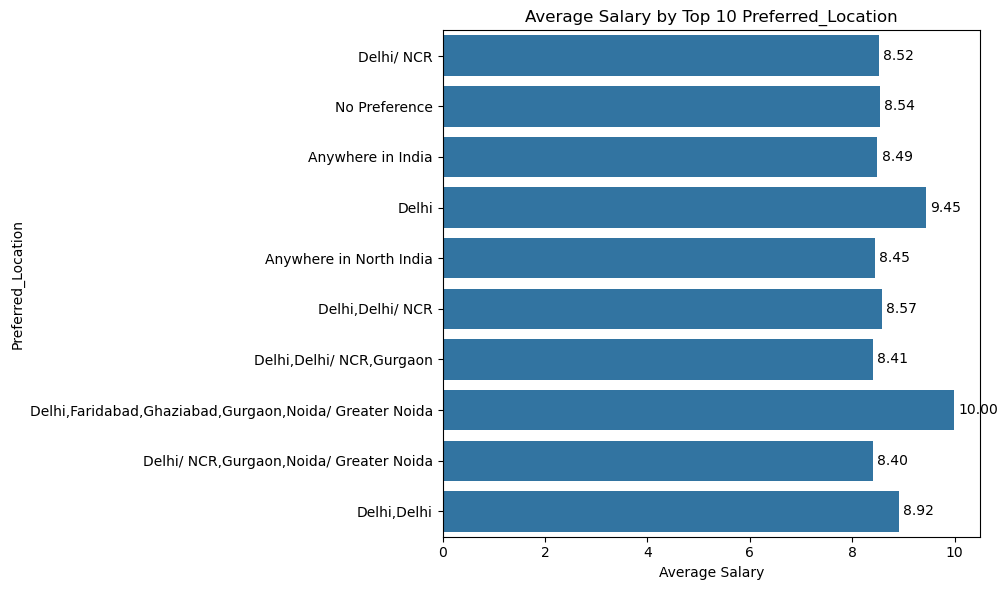

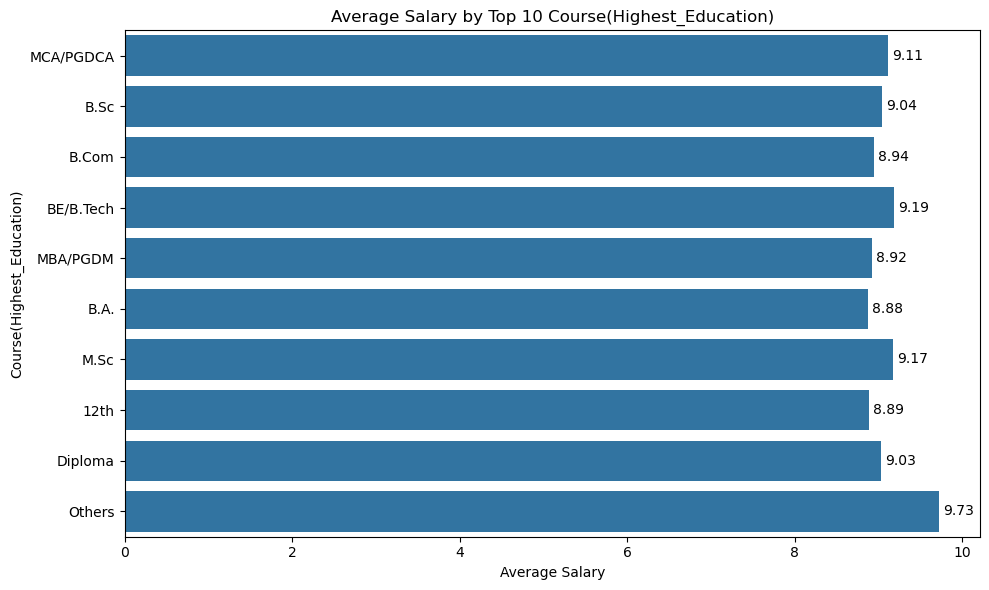

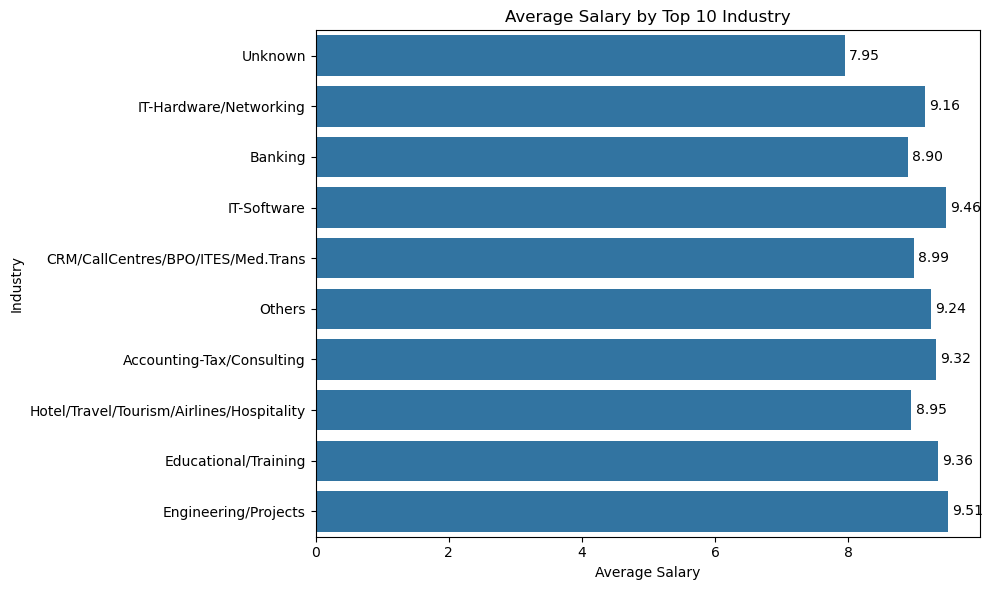

In [232]:
salary_vs_category_barplot(df, 'Level')
salary_vs_category_barplot(df, 'Functional_Area')
salary_vs_category_barplot(df, 'City')
salary_vs_category_barplot(df, 'Preferred_Location')
salary_vs_category_barplot(df, 'Course(Highest_Education)')
salary_vs_category_barplot(df, 'Industry')

#### Highest salary is earned by people who work as Chief officers and is mostly from Ahmedabad but prefer to work out of Delhi and belong to Engineering Projects industry.

### Work Exp vs categorical Variables

In [233]:
def workexp_vs_category_barplot(df, column, top_n=10):
    top_categories = df[column].value_counts().nlargest(top_n).index
    filtered_df = df[df[column].isin(top_categories)]

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=filtered_df, y=column, x='Work_exp_Cleaned', estimator='mean', ci=None)
    plt.title(f'Average Work Experience by Top {top_n} {column}')
    plt.xlabel('Average Work Experience (Years)')
    plt.ylabel(column)
    plt.tight_layout()

    # Add text labels to bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

    plt.show()


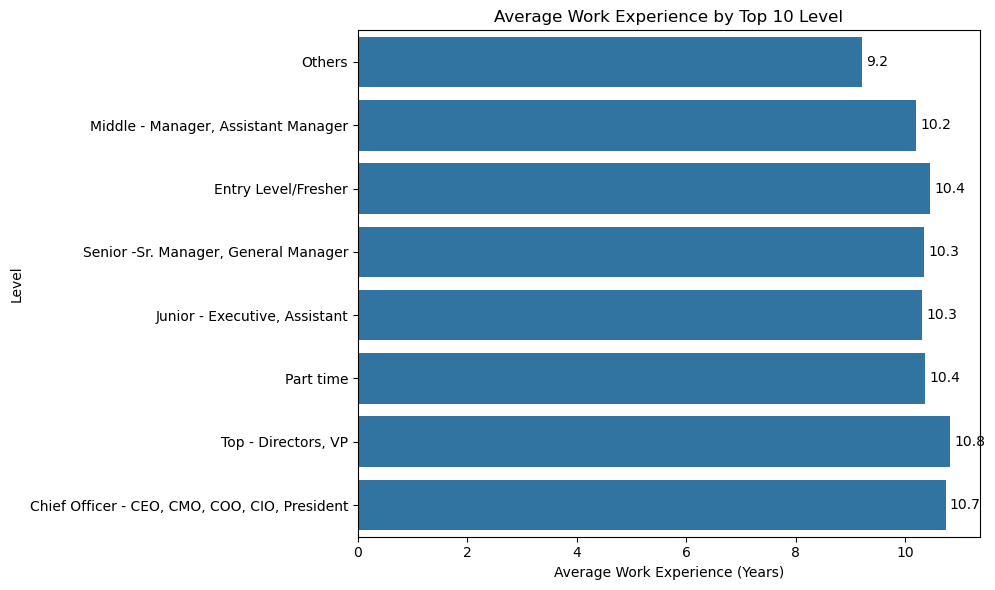

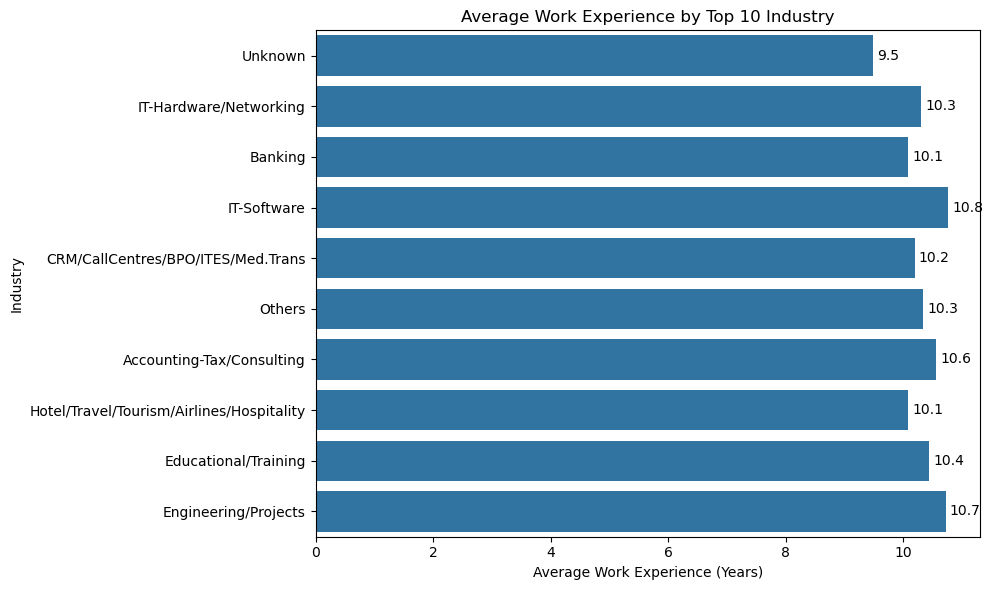

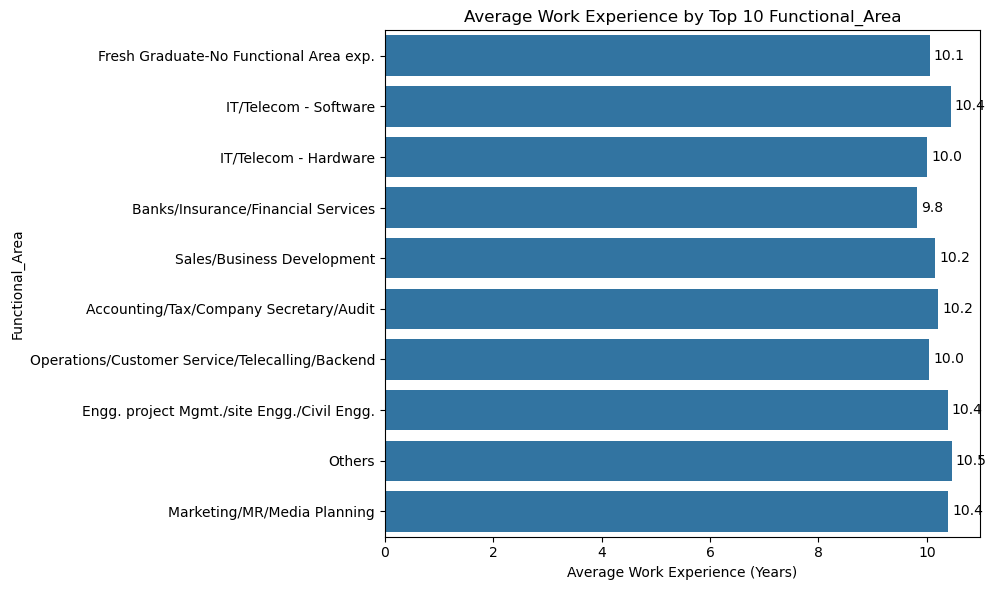

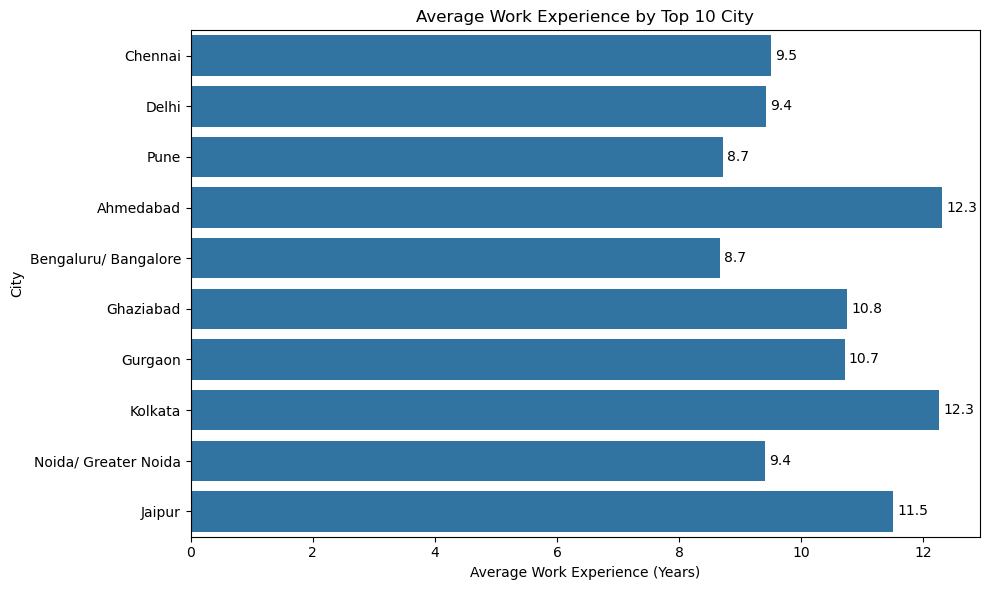

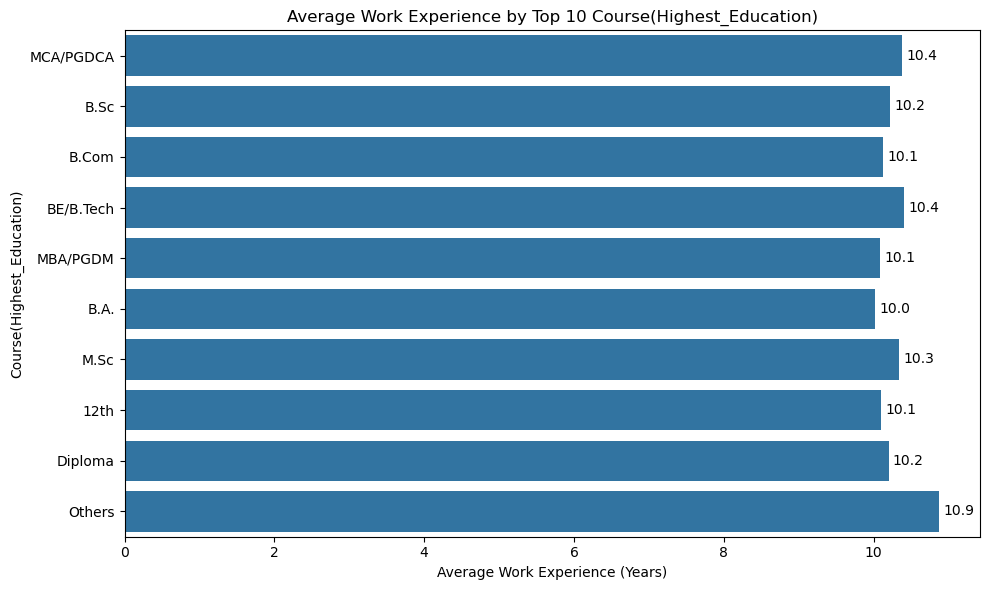

In [234]:
workexp_vs_category_barplot(df, 'Level')
workexp_vs_category_barplot(df, 'Industry')
workexp_vs_category_barplot(df, 'Functional_Area')
workexp_vs_category_barplot(df, 'City')
workexp_vs_category_barplot(df, 'Course(Highest_Education)')


#### Highest Work experience people are generally working as Top - Directors, VPs and mostly in IT-Software Industry and mostly based out of Kolkata and Ahmedabad.

### Categorical vs categorical Bivariate Analysis

In [235]:
def plot_categorical_heatmap(df, col1, col2, top_n1=10, top_n2=10):
    # Filter top N categories in both dimensions
    top1 = df[col1].value_counts().nlargest(top_n1).index
    top2 = df[col2].value_counts().nlargest(top_n2).index
    filtered_df = df[df[col1].isin(top1) & df[col2].isin(top2)]

    # Create a cross-tab and plot heatmap
    ct = pd.crosstab(filtered_df[col1], filtered_df[col2])

    plt.figure(figsize=(12, 6))
    sns.heatmap(ct, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='gray')
    plt.title(f'{col1} vs {col2} - Frequency Heatmap')
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


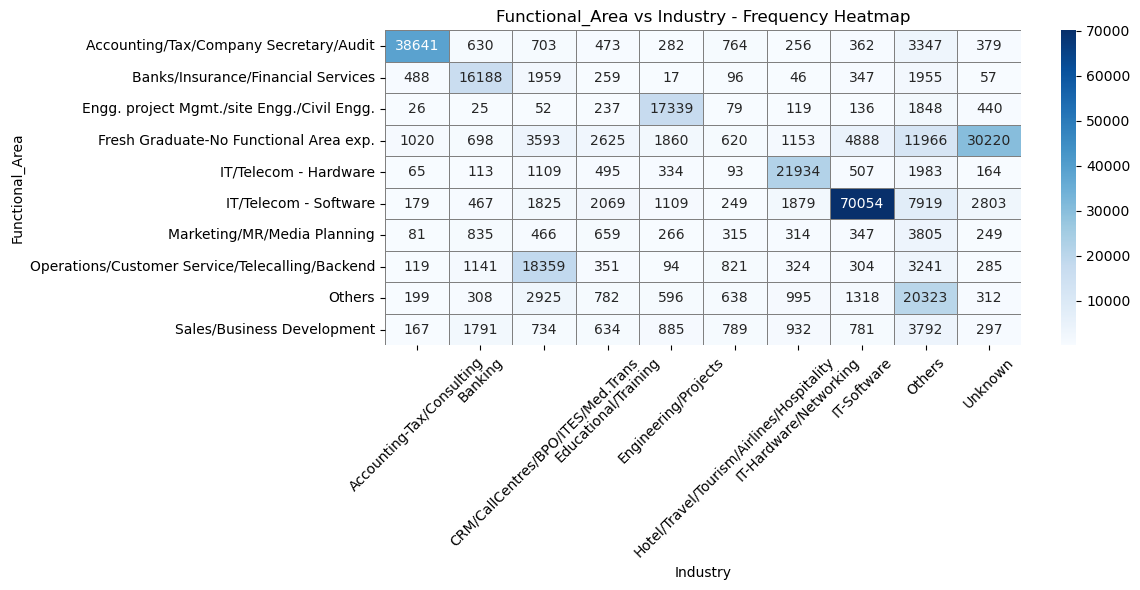

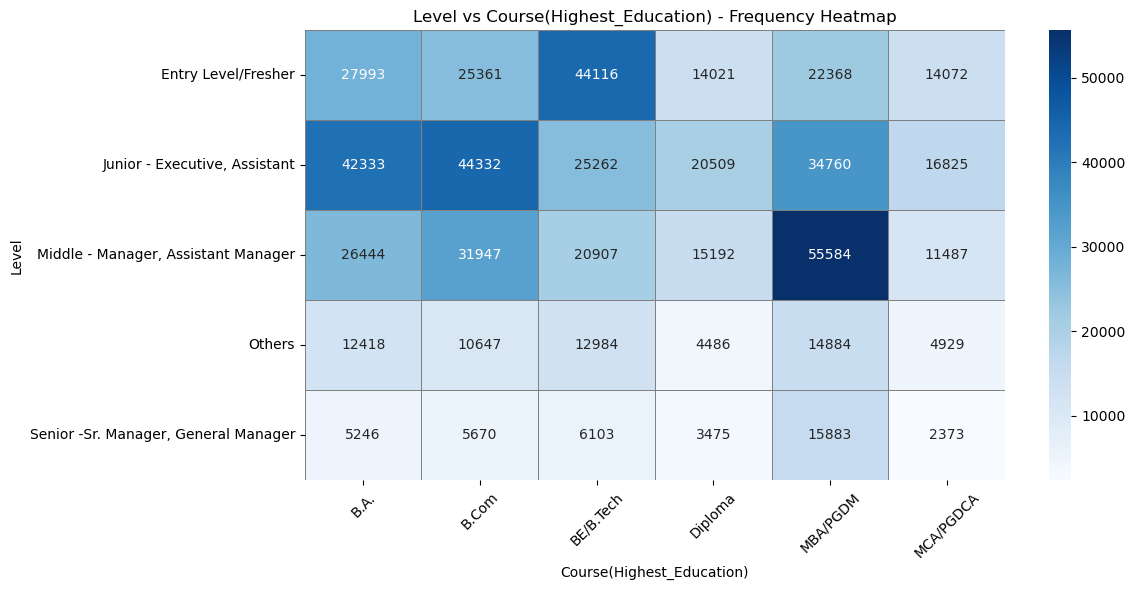

In [236]:
# Functional Area vs Industry (Top 10 of each)
plot_categorical_heatmap(df, 'Functional_Area', 'Industry', top_n1=10, top_n2=10)

# Level vs Course(Highest_Education)
plot_categorical_heatmap(df, 'Level', 'Course(Highest_Education)', top_n1=5, top_n2=6)

### Insights :
1. The highest occurance are for people in IT-Software industry and is largely dominated by functional areas Telecom. Similary in Accounting-Tax and Consulating Banking industry, the dominating functional area is Accounting/tax/Company Secretary/ Audit.
2. For Unknown industries the most dominating functional area is Freshers - this could likely be because these are college graduates that have little to no industry experience and hence is not mapped into any industry.
3. Most middle level posts like managers or Asst. Managers have an MBA or PGDM 

### Continuous vs Continuous

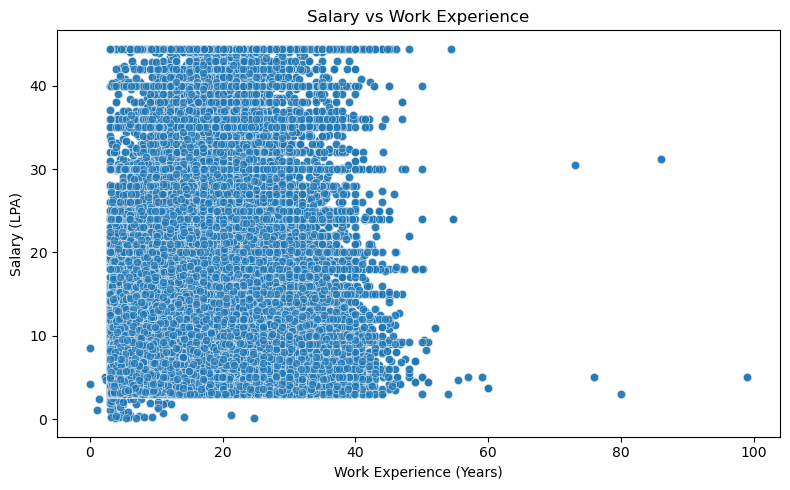

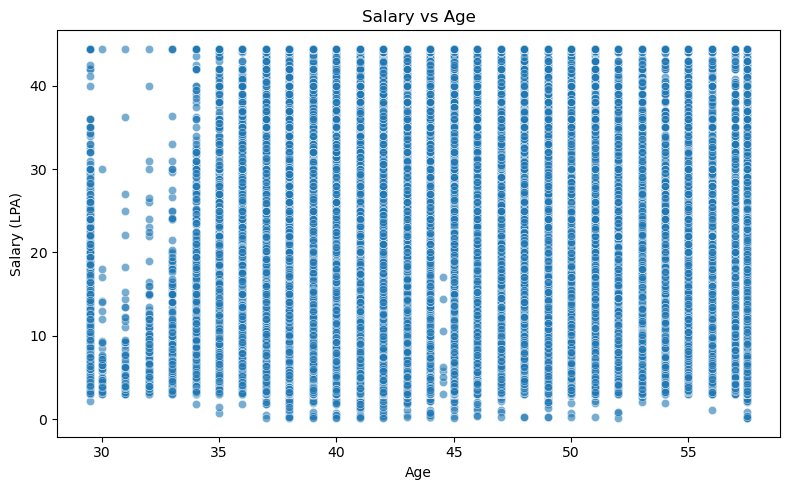

In [237]:
# Salary vs Work Experience
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Work_exp_Cleaned', y='Salary_Cleaned', alpha=0.6)
plt.title('Salary vs Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Salary (LPA)')
plt.tight_layout()
plt.show()

# Age vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Salary_Cleaned', alpha=0.6)
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary (LPA)')
plt.tight_layout()
plt.show()


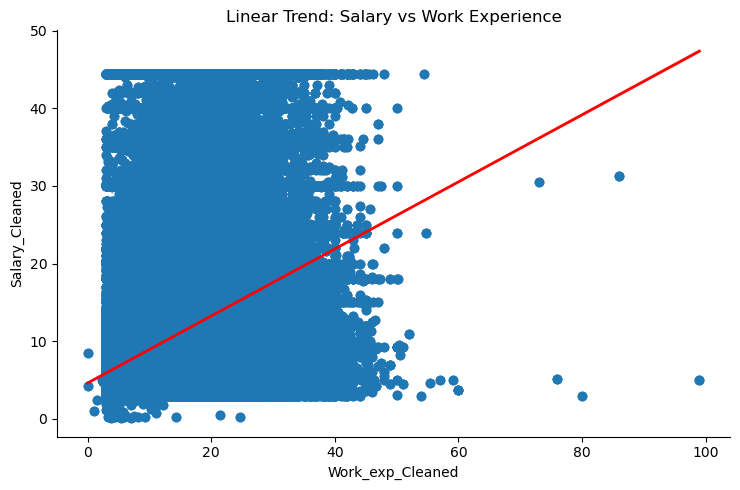

In [239]:
# Salary vs Work Experience with Trend Line
sns.lmplot(data=df, x='Work_exp_Cleaned', y='Salary_Cleaned', aspect=1.5,  line_kws={'color': 'red', 'linewidth': 2})
plt.title('Linear Trend: Salary vs Work Experience')
plt.tight_layout()
plt.show()


In [240]:
X = df[['Salary_Cleaned', 'Work_exp_Cleaned']]
X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

           Variable       VIF
0             const  3.744119
1    Salary_Cleaned  1.203680
2  Work_exp_Cleaned  1.203680


#### The above graph shows that there is positive correlation between salary and work experience and on calculation of VIF came up with values that are less than 5 indicating no concerns for multicollinearity. This indicates that Work experience is an integral part in the salary earned.

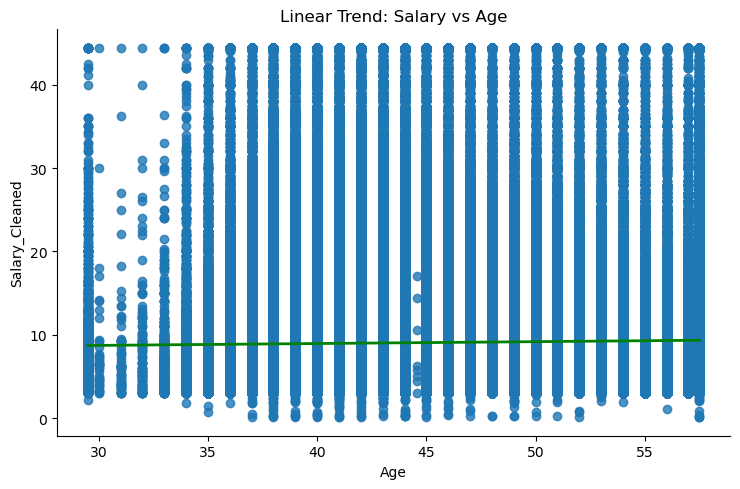

In [242]:
sns.lmplot(data=df, x='Age', y='Salary_Cleaned', aspect=1.5, 
           line_kws={'color': 'green', 'linewidth': 2})
plt.title('Linear Trend: Salary vs Age')
plt.tight_layout()
plt.show()


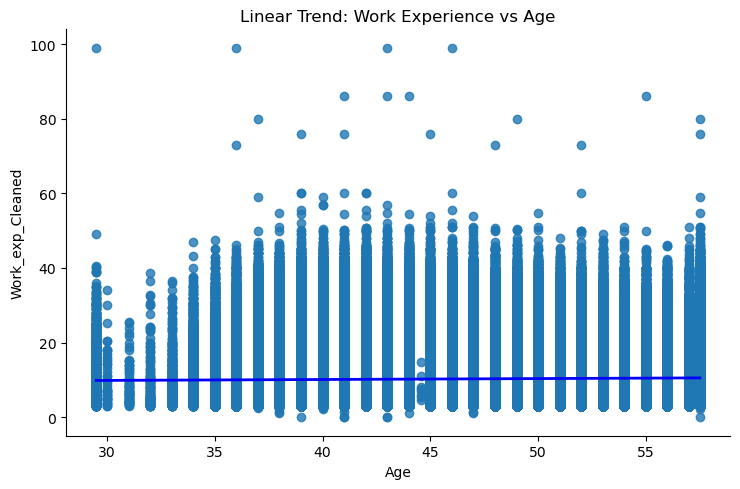

In [243]:
sns.lmplot(data=df, x='Age', y='Work_exp_Cleaned', aspect=1.5, 
           line_kws={'color': 'blue', 'linewidth': 2})
plt.title('Linear Trend: Work Experience vs Age')
plt.tight_layout()
plt.show()


In [245]:


X = df[['Age', 'Salary_Cleaned', 'Work_exp_Cleaned']]
X = add_constant(X)

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


           Variable        VIF
0             const  62.756367
1               Age   1.000528
2    Salary_Cleaned   1.203809
3  Work_exp_Cleaned   1.203931


### Insights: 
1. There's no significant linear relationship between Age and Salary or Age and Work Exp either.
2. Salary does not systematically increase or decrease with age in your dataset. 
3. Likely to have candidates across all age groups earning both high and low salaries.
4. No Multicollinearity either amongst these variables.

## Data pre-processing for developing machine learning models

##### We went back to the initial data cleaning steps and handled City column by cleaning and retaining only the target cities in the that collumn. Moving forward we will be cleaning all the categorical columns like Key_skills, Area_of_expertise etc to vectorise and encode them for further training of the model.

In [58]:
# Cleaning key skills collumns to vectorize

df['Key_Skills_Clean'] = df['Key_Skills'].fillna('').apply(
    lambda x: [skill.strip().upper() for skill in str(x).split(',') if skill.strip()])


In [59]:
df['Key_Skills_Clean']

0         [.NET, ACCESS, ASCP, ASP, ASP.NET, BANKING, C#...
1         [ACCESS, APACHE, ASP, ASP.NET, B2B SOFTWARE, C...
2                                   [HARDWARE & NETWORKING]
3                               [ENGINEERING/MANUFACTURING]
4         [MARKETING, BUSINESS DEVELOPMENT, CREATING NEW...
                                ...                        
907670    [LOGISTICS/TRANSPORT/SUPPLY, SUPPLY CHAIN/SUPP...
907671                  [ASP.NET, C, JAVA, SQL SERVER 2000]
907672                      [MBA - INTERNATIONAL BUSSINESS]
907673                     [MCSE, CCNA, MS-EXCHANGE, WI-FI]
907674                                            [UNKNOWN]
Name: Key_Skills_Clean, Length: 905122, dtype: object

In [60]:
# Idnetifying Delhi NCR cities and creating target for Problem statement 2 
delhi_ncr_set = {"Delhi", "Noida", "Gurgaon", "Faridabad"}
df['Target_Delhi_NCR'] = df['Preferred_Location'].apply(lambda x: 1 if x in delhi_ncr_set else 0)


In [61]:
df

,City,DOB,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Key_Skills,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned,Key_Skills_Clean,Target_Delhi_NCR
0,Chennai,1983-07-02,Fresh Graduate-No Functional Area exp.,Other Fresh Grad,Unknown,MCA- Fresher seeking a job in IT Sector.,".NET,ACCESS,ASCP, ASP,ASP.NET,BANKING, C#,C++,...",Others,Delhi/ NCR,MCA/PGDCA,Computers,Others,42.0,3.0,3.00,"[.NET, ACCESS, ASCP, ASP, ASP.NET, BANKING, C#...",0
1,Chennai,1979-06-07,IT/Telecom - Software,"Database Administration (DBA), Quality Assuran...","Software Services, Internet/Dot com/ISP",Software Tester and developer,"ACCESS,APACHE,ASP, ASP.NET,B2B SOFTWARE,C++, D...",Others,No Preference,B.Sc,Maths,Delhi University,46.0,3.4,3.58,"[ACCESS, APACHE, ASP, ASP.NET, B2B SOFTWARE, C...",0
2,Chennai,2000-02-13,IT/Telecom - Hardware,H/W Installation/Maintenance,IT-Hardware/Networking,System Administrator,Hardware & Networking,"Middle - Manager, Assistant Manager",Delhi/ NCR,B.Com,Commerce Honors,Jiwaji University,25.0,3.8,3.83,[HARDWARE & NETWORKING],0
3,Chennai,1980-09-14,IT/Telecom - Software,Other Fresh Grad,Unknown,"softwares/Business Development, 1-Year/Delhi","Engineering/Manufacturing,",Entry Level/Fresher,Delhi/ NCR,BE/B.Tech,Electronics/Telecommunication,Others,44.0,4.0,3.58,[ENGINEERING/MANUFACTURING],0
4,Chennai,1984-05-01,Banks/Insurance/Financial Services,Equity Analyst,Consumer Durables/FMCG,complated MBA/PGDM,"marketing, business development,creating new b...",Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,Marketing,Others,41.0,7.5,6.17,"[MARKETING, BUSINESS DEVELOPMENT, CREATING NEW...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907670,Kolkata,1987-08-29,Materials/Logistics/Supply Chain Mgmt/Procurement,Operations,Consumer Durables/FMCG,"B.A., Materials/Logistics/Supply Chain Managem...","Logistics/Transport/Supply, Supply Chain/Suppl...",Entry Level/Fresher,Delhi,B.A.,Other B.A.,Others,37.0,5.0,8.58,"[LOGISTICS/TRANSPORT/SUPPLY, SUPPLY CHAIN/SUPP...",1
907671,Other,1983-03-08,IT/Telecom - Software,Engineering,IT-Software,Software Developer,"Asp.net,C,Java,Sql Server 2000","Junior - Executive, Assistant","Chandigarh,Delhi,Delhi,Faridabad,Ghaziabad,Gur...",MCA/PGDCA,Computers,Others,42.0,14.0,7.67,"[ASP.NET, C, JAVA, SQL SERVER 2000]",0
907672,Gurgaon,1968-08-15,"Export/Import, Finance",Customer Service (Web),"Export/Import/Merchandising, Financial Service...",M.I.B (Master Of International Business),MBA - International Bussiness,Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,International Business,Others,56.0,15.0,8.33,[MBA - INTERNATIONAL BUSSINESS],0
907673,Ahmedabad,1983-12-23,IT/Telecom - Hardware,Electrical/Electronic,IT-Hardware/Networking,"for network-engineer ,desktop-support engineer...","MCSE , CCNA, MS-EXCHANGE , WI-FI",Entry Level/Fresher,Delhi,Others,Information Technology,Others,41.0,3.7,6.75,"[MCSE, CCNA, MS-EXCHANGE, WI-FI]",1


In [62]:
df.dtypes

City                                         object
DOB                                  datetime64[ns]
Functional_Area                              object
Area_of_Specialization                       object
Industry                                     object
Resume_Title                                 object
Key_Skills                                   object
Level                                        object
Preferred_Location                           object
Course(Highest_Education)                    object
Specialization(Highest_Education)            object
Institute(Highest_Education)                 object
Age                                         float64
Salary_Cleaned                              float64
Work_exp_Cleaned                            float64
Key_Skills_Clean                             object
Target_Delhi_NCR                              int64
dtype: object

In [63]:
#dropping the original collumns of their cleaned counterparts
drop_ogs = ["DOB","Key_Skills"]
df.drop(drop_ogs, axis=1, inplace=True)

### Data Preprocess for ML Training

#### Encoding Key Skills Cleaned collumn
#### Since the number of unique key skills are huge (>4000), we will take only the top 10% skills and encode.
#### First we count the frequency of skills and find top 410

In [64]:

all_skills = [skill for skills_list in df['Key_Skills_Clean'] for skill in skills_list]
skill_counts = Counter(all_skills)

#then we keep the top 250
top_skills = set([skill for skill, count in skill_counts.most_common(410)])

# filter for these skills in the dataset
df['Key_Skills_Clean'] = df['Key_Skills_Clean'].apply(
    lambda skills: [skill for skill in skills if skill in top_skills]
)

In [65]:
# Vectorizing
mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(df['Key_Skills_Clean'])

skills_df = pd.DataFrame(skills_encoded, columns=mlb.classes_)

df = pd.concat([df.reset_index(drop=True), skills_df.reset_index(drop=True)], axis=1)



In [66]:
df

,City,Functional_Area,Area_of_Specialization,Industry,Resume_Title,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),...,WEB TECHNOLOGIES,WINDOWS,WINDOWS 2000,WINDOWS 98,WINDOWS NT,WINDOWS XP,WORD,WRITING,XML,XP
0,Chennai,Fresh Graduate-No Functional Area exp.,Other Fresh Grad,Unknown,MCA- Fresher seeking a job in IT Sector.,Others,Delhi/ NCR,MCA/PGDCA,Computers,Others,...,0,0,0,0,0,0,0,0,1,0
1,Chennai,IT/Telecom - Software,"Database Administration (DBA), Quality Assuran...","Software Services, Internet/Dot com/ISP",Software Tester and developer,Others,No Preference,B.Sc,Maths,Delhi University,...,0,0,0,0,0,0,0,0,0,0
2,Chennai,IT/Telecom - Hardware,H/W Installation/Maintenance,IT-Hardware/Networking,System Administrator,"Middle - Manager, Assistant Manager",Delhi/ NCR,B.Com,Commerce Honors,Jiwaji University,...,0,0,0,0,0,0,0,0,0,0
3,Chennai,IT/Telecom - Software,Other Fresh Grad,Unknown,"softwares/Business Development, 1-Year/Delhi",Entry Level/Fresher,Delhi/ NCR,BE/B.Tech,Electronics/Telecommunication,Others,...,0,0,0,0,0,0,0,0,0,0
4,Chennai,Banks/Insurance/Financial Services,Equity Analyst,Consumer Durables/FMCG,complated MBA/PGDM,Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,Marketing,Others,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905117,Kolkata,Materials/Logistics/Supply Chain Mgmt/Procurement,Operations,Consumer Durables/FMCG,"B.A., Materials/Logistics/Supply Chain Managem...",Entry Level/Fresher,Delhi,B.A.,Other B.A.,Others,...,0,0,0,0,0,0,0,0,0,0
905118,Other,IT/Telecom - Software,Engineering,IT-Software,Software Developer,"Junior - Executive, Assistant","Chandigarh,Delhi,Delhi,Faridabad,Ghaziabad,Gur...",MCA/PGDCA,Computers,Others,...,0,0,0,0,0,0,0,0,0,0
905119,Gurgaon,"Export/Import, Finance",Customer Service (Web),"Export/Import/Merchandising, Financial Service...",M.I.B (Master Of International Business),Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,International Business,Others,...,0,0,0,0,0,0,0,0,0,0
905120,Ahmedabad,IT/Telecom - Hardware,Electrical/Electronic,IT-Hardware/Networking,"for network-engineer ,desktop-support engineer...",Entry Level/Fresher,Delhi,Others,Information Technology,Others,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df = df.drop(['Key_Skills_Clean'], axis=1)

In [68]:
len(df["Industry"].unique())

7066

In [69]:
len(df["Functional_Area"].unique())

5407

In [70]:
len(df["Area_of_Specialization"].unique())

29547

#### Now we replace each category with how frequently it appears in the below columns


In [71]:
def frequency_encode(df, col):
    freq_map = df[col].value_counts(normalize=True)
    df[col + "_freq_enc"] = df[col].map(freq_map)
    df.drop(columns=col, inplace=True)
    return df

In [72]:
for col in ["Industry", "Functional_Area", "Area_of_Specialization"]:
    df = frequency_encode(df, col)

In [73]:
df

,City,Resume_Title,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned,...,WINDOWS 98,WINDOWS NT,WINDOWS XP,WORD,WRITING,XML,XP,Industry_freq_enc,Functional_Area_freq_enc,Area_of_Specialization_freq_enc
0,Chennai,MCA- Fresher seeking a job in IT Sector.,Others,Delhi/ NCR,MCA/PGDCA,Computers,Others,42.0,3.0,3.00,...,0,0,0,0,0,1,0,0.040186,0.075828,0.024262
1,Chennai,Software Tester and developer,Others,No Preference,B.Sc,Maths,Delhi University,46.0,3.4,3.58,...,0,0,0,0,0,0,0,0.002868,0.126628,0.000042
2,Chennai,System Administrator,"Middle - Manager, Assistant Manager",Delhi/ NCR,B.Com,Commerce Honors,Jiwaji University,25.0,3.8,3.83,...,0,0,0,0,0,0,0,0.039400,0.040630,0.010451
3,Chennai,"softwares/Business Development, 1-Year/Delhi",Entry Level/Fresher,Delhi/ NCR,BE/B.Tech,Electronics/Telecommunication,Others,44.0,4.0,3.58,...,0,0,0,0,0,0,0,0.040186,0.126628,0.024262
4,Chennai,complated MBA/PGDM,Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,Marketing,Others,41.0,7.5,6.17,...,0,0,0,0,0,0,0,0.021790,0.046706,0.000671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905117,Kolkata,"B.A., Materials/Logistics/Supply Chain Managem...",Entry Level/Fresher,Delhi,B.A.,Other B.A.,Others,37.0,5.0,8.58,...,0,0,0,0,0,0,0,0.021790,0.017915,0.011368
905118,Other,Software Developer,"Junior - Executive, Assistant","Chandigarh,Delhi,Delhi,Faridabad,Ghaziabad,Gur...",MCA/PGDCA,Computers,Others,42.0,14.0,7.67,...,0,0,0,0,0,0,0,0.100143,0.126628,0.003949
905119,Gurgaon,M.I.B (Master Of International Business),Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,International Business,Others,56.0,15.0,8.33,...,0,0,0,0,0,0,0,0.000002,0.000080,0.002994
905120,Ahmedabad,"for network-engineer ,desktop-support engineer...",Entry Level/Fresher,Delhi,Others,Information Technology,Others,41.0,3.7,6.75,...,0,0,0,0,0,0,0,0.039400,0.040630,0.005088


In [74]:
df.columns[:19]

Index(['City', 'Resume_Title', 'Level', 'Preferred_Location',
       'Course(Highest_Education)', 'Specialization(Highest_Education)',
       'Institute(Highest_Education)', 'Age', 'Salary_Cleaned',
       'Work_exp_Cleaned', 'Target_Delhi_NCR', '.NET', '2000', ':',
       ': ACCOUNT', ': ACCOUNTANT', ': CIVIL',
       ': DATA ENTRY/COMPUTER OPERATOR', ': ENVIRONMENT'],
      dtype='object')

In [75]:
len(df["Level"].unique())

8

In [76]:

len(df["Course(Highest_Education)"].unique())

37

In [77]:
len(df["Specialization(Highest_Education)"].unique())


172

In [78]:
len(df["Institute(Highest_Education)"].unique())

192

#### Reduce cardinality for large categorical vars


In [79]:
def reduce_cardinality(df, col, top_n=50):
    top_cats = df[col].value_counts().nlargest(top_n).index
    df[col] = df[col].apply(lambda x: x if x in top_cats else 'Other')
    return df

In [80]:
for col in ['Specialization(Highest_Education)', 'Institute(Highest_Education)']:
    df = reduce_cardinality(df, col, top_n=50)

In [81]:
df

,City,Resume_Title,Level,Preferred_Location,Course(Highest_Education),Specialization(Highest_Education),Institute(Highest_Education),Age,Salary_Cleaned,Work_exp_Cleaned,...,WINDOWS 98,WINDOWS NT,WINDOWS XP,WORD,WRITING,XML,XP,Industry_freq_enc,Functional_Area_freq_enc,Area_of_Specialization_freq_enc
0,Chennai,MCA- Fresher seeking a job in IT Sector.,Others,Delhi/ NCR,MCA/PGDCA,Computers,Others,42.0,3.0,3.00,...,0,0,0,0,0,1,0,0.040186,0.075828,0.024262
1,Chennai,Software Tester and developer,Others,No Preference,B.Sc,Maths,Delhi University,46.0,3.4,3.58,...,0,0,0,0,0,0,0,0.002868,0.126628,0.000042
2,Chennai,System Administrator,"Middle - Manager, Assistant Manager",Delhi/ NCR,B.Com,Commerce Honors,Jiwaji University,25.0,3.8,3.83,...,0,0,0,0,0,0,0,0.039400,0.040630,0.010451
3,Chennai,"softwares/Business Development, 1-Year/Delhi",Entry Level/Fresher,Delhi/ NCR,BE/B.Tech,Electronics/Telecommunication,Others,44.0,4.0,3.58,...,0,0,0,0,0,0,0,0.040186,0.126628,0.024262
4,Chennai,complated MBA/PGDM,Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,Marketing,Others,41.0,7.5,6.17,...,0,0,0,0,0,0,0,0.021790,0.046706,0.000671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905117,Kolkata,"B.A., Materials/Logistics/Supply Chain Managem...",Entry Level/Fresher,Delhi,B.A.,Other B.A.,Others,37.0,5.0,8.58,...,0,0,0,0,0,0,0,0.021790,0.017915,0.011368
905118,Other,Software Developer,"Junior - Executive, Assistant","Chandigarh,Delhi,Delhi,Faridabad,Ghaziabad,Gur...",MCA/PGDCA,Computers,Others,42.0,14.0,7.67,...,0,0,0,0,0,0,0,0.100143,0.126628,0.003949
905119,Gurgaon,M.I.B (Master Of International Business),Entry Level/Fresher,Delhi/ NCR,MBA/PGDM,International Business,Others,56.0,15.0,8.33,...,0,0,0,0,0,0,0,0.000002,0.000080,0.002994
905120,Ahmedabad,"for network-engineer ,desktop-support engineer...",Entry Level/Fresher,Delhi,Others,Information Technology,Others,41.0,3.7,6.75,...,0,0,0,0,0,0,0,0.039400,0.040630,0.005088


In [82]:
for col in ['Specialization(Highest_Education)', 'Institute(Highest_Education)']:
    df = frequency_encode(df, col)

In [83]:
df = df.drop(['Resume_Title', 'Preferred_Location'], axis=1, errors='ignore')


In [84]:
df = pd.get_dummies(df, columns=[
    'City',
    'Level',
    'Course(Highest_Education)',
], drop_first=True)

In [85]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [86]:
df

,Age,Salary_Cleaned,Work_exp_Cleaned,Target_Delhi_NCR,.NET,2000,:,: ACCOUNT,: ACCOUNTANT,: CIVIL,...,Course(Highest_Education)_M.Sc,Course(Highest_Education)_MA,Course(Highest_Education)_MBA/PGDM,Course(Highest_Education)_MBBS,Course(Highest_Education)_MCA/PGDCA,Course(Highest_Education)_MD/MS,Course(Highest_Education)_MDS,Course(Highest_Education)_ME/M.Tech,Course(Highest_Education)_ML/LLM,Course(Highest_Education)_Others
0,42.0,3.0,3.00,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,46.0,3.4,3.58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25.0,3.8,3.83,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44.0,4.0,3.58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.0,7.5,6.17,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905117,37.0,5.0,8.58,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
905118,42.0,14.0,7.67,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
905119,56.0,15.0,8.33,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
905120,41.0,3.7,6.75,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
df.dtypes

Age                                    float64
Salary_Cleaned                         float64
Work_exp_Cleaned                       float64
Target_Delhi_NCR                         int64
.NET                                     int32
                                        ...   
Course(Highest_Education)_MD/MS          int32
Course(Highest_Education)_MDS            int32
Course(Highest_Education)_ME/M.Tech      int32
Course(Highest_Education)_ML/LLM         int32
Course(Highest_Education)_Others         int32
Length: 473, dtype: object

### Preparing test data

In [88]:
df2=pd.read_excel(r"C:\Users\rhari\OneDrive\Documents\MBA\capstone 2\Test_share.xlsx")

In [89]:
# Count missing values per column
print(df2.isnull().sum())

# Percentage of missing values
missing_percent = df2.isnull().mean() * 100
print(missing_percent)
df2.dtypes

City                                      6866
DOB                                          0
Functional_Area                            182
Area_of_Specialization                    1377
Industry                                  1660
Resume_Title                                53
Key_Skills                                1404
Company                                      0
Salary                                      25
Work_Experience                              0
Level                                      675
Preferred_Location                           1
Course(Highest_Education)                    1
Specialization(Highest_Education)           54
Institute(Highest_Education)              1601
Course(2nd_Highest_Education)             8962
Specialization(2nd_Highest_Education)     9347
Institute(2nd_Highest_Education)         10552
dtype: int64
City                                     26.316596
DOB                                       0.000000
Functional_Area                        

City                                             object
DOB                                      datetime64[ns]
Functional_Area                                  object
Area_of_Specialization                           object
Industry                                         object
Resume_Title                                     object
Key_Skills                                       object
Company                                          object
Salary                                           object
Work_Experience                                  object
Level                                            object
Preferred_Location                               object
Course(Highest_Education)                        object
Specialization(Highest_Education)                object
Institute(Highest_Education)                     object
Course(2nd_Highest_Education)                    object
Specialization(2nd_Highest_Education)            object
Institute(2nd_Highest_Education)                

In [90]:
# converting dob to datetime
df2['DOB'] = pd.to_datetime(df2['DOB'], errors='coerce')


In [91]:
# calculating age
today = pd.Timestamp.today()
df2['Age'] = (today - df2['DOB']).dt.days // 365

In [92]:
df2["Salary_Cleaned"] = df2["Salary"].apply(parse_salary)

In [93]:
df2["Work_exp_Cleaned"] = df2["Work_Experience"].apply(parse_experience)

In [94]:
# dropping colmns with >20percent null values
cols_to_drop = ["Course(2nd_Highest_Education)","Specialization(2nd_Highest_Education)","Institute(2nd_Highest_Education)"]
df2.drop(columns=cols_to_drop,inplace=True, axis=1)

In [95]:
df2["Institute(Highest_Education)"] = df2["Institute(Highest_Education)"].apply(
    lambda x: "Unknown" if x == 5.823689215512981e-293 else x
)

In [96]:
# dropping rows that have null in all the collumns as they provide no information respect to the cadidates specialization
# as their area of expertise, education and specialization training columns are expty 
cols =["Specialization(Highest_Education)", "Area_of_Specialization","Institute(Highest_Education)"]
df2 = df2.dropna(subset=[
    "Specialization(Highest_Education)",
    "Area_of_Specialization",
    "Institute(Highest_Education)"
], how='all')

In [97]:
df2["Institute(Highest_Education)"] = df2["Institute(Highest_Education)"].fillna("Others")
df2["Area_of_Specialization"] = df2["Area_of_Specialization"].fillna("Others")
df2["Key_Skills"] = df2["Key_Skills"].fillna("Unknown")
df2["Industry"] = df2["Industry"].fillna("Unknown")

In [98]:
impute_mean_cols = ["Salary_Cleaned","Work_exp_Cleaned"]
for col in impute_mean_cols:
    mean_value = df2[col].mean()
    df2[col].fillna(mean_value, inplace=True)

In [99]:
df2["Age"].fillna(df2["Age"].mean(), inplace=True)

In [100]:
impute_cols_mode = "Preferred_Location","Course(Highest_Education)","Specialization(Highest_Education)"
for col in impute_cols_mode:
    mode_value = df2[col].mode()[0]
    df2[col].fillna(mode_value, inplace=True)

In [101]:
impute_cols_mode = ["Resume_Title","Functional_Area","City"]
for col in impute_cols_mode:
    mode_value = df2[col].mode()[0]
    df2[col].fillna(mode_value, inplace=True)

In [102]:
df2["DOB"].fillna(df2["DOB"].mean(), inplace=True)
df2['Level'].fillna('Others', inplace=True)

In [103]:
df2.drop(columns=['Salary', 'Work_Experience'], inplace=True)

In [104]:
missing_percent = df2.isnull().mean() * 100
print(missing_percent)

City                                 0.0
DOB                                  0.0
Functional_Area                      0.0
Area_of_Specialization               0.0
Industry                             0.0
Resume_Title                         0.0
Key_Skills                           0.0
Company                              0.0
Level                                0.0
Preferred_Location                   0.0
Course(Highest_Education)            0.0
Specialization(Highest_Education)    0.0
Institute(Highest_Education)         0.0
Age                                  0.0
Salary_Cleaned                       0.0
Work_exp_Cleaned                     0.0
dtype: float64


In [105]:
# Cleaning and retaining only the target cities in the City Collumn

target_cities = [
    "Ahmedabad", "Bangalore", "Bangalore/Bengaluru", "Chennai", "Delhi",
    "Gurgaon", "Faridabad", "Kolkata", "Mumbai", "Hyderabad", "Jaipur",
    "Surat", "Kanpur", "Noida"
]
df2['City'] = df2['City'].str.strip()
df2['City'] = df2['City'].apply(lambda x: x if x in target_cities else 'Other')

In [106]:
# Cleaning key skills collumns to vectorize

df2['Key_Skills_Clean'] = df2['Key_Skills'].fillna('').apply(
    lambda x: [skill.strip().upper() for skill in str(x).split(',') if skill.strip()])


In [107]:
# Idnetifying Delhi NCR cities and creating target for Problem statement 2 
delhi_ncr_set = {"Delhi", "Noida", "Gurgaon", "Faridabad"}
df2['Target_Delhi_NCR'] = df2['Preferred_Location'].apply(lambda x: 1 if x in delhi_ncr_set else 0)


In [108]:
#dropping the original collumns of their cleaned counterparts
drop_ogs = ["DOB","Key_Skills"]
df2.drop(drop_ogs, axis=1, inplace=True)

In [109]:
#encoding Key Skills Cleaned collumn
# Since the number of unique key skills are huge (>4000), we will take only the top 10% skills and encode.
# First we count the frequency of skills and find top 250.
all_skills = [skill for skills_list in df2['Key_Skills_Clean'] for skill in skills_list]
skill_counts = Counter(all_skills)

#then we keep the top 250
top_skills = set([skill for skill, count in skill_counts.most_common(410)])

# filter for these skills in the dataset
df2['Key_Skills_Clean'] = df2['Key_Skills_Clean'].apply(
    lambda skills: [skill for skill in skills if skill in top_skills]
)

In [110]:
# Vectorizing
skills_encoded = mlb.transform(df2['Key_Skills_Clean'])

skills_df = pd.DataFrame(skills_encoded, columns=mlb.classes_)

df2 = pd.concat([df2.reset_index(drop=True), skills_df.reset_index(drop=True)], axis=1)

In [111]:
df2 = df2.drop(['Key_Skills_Clean'], axis=1)

In [112]:
for col in ["Industry", "Functional_Area", "Area_of_Specialization"]:
    df2 = frequency_encode(df2, col)

In [113]:
for col in ['Specialization(Highest_Education)', 'Institute(Highest_Education)']:
    df2 = reduce_cardinality(df2, col, top_n=50)

In [114]:
for col in ['Specialization(Highest_Education)', 'Institute(Highest_Education)']:
    df2 = frequency_encode(df2, col)

In [115]:
df2 = df2.drop(['Resume_Title', 'Preferred_Location'], axis=1, errors='ignore')

In [116]:
df2 = pd.get_dummies(df2, columns=[
    'City',
    'Level',
    'Course(Highest_Education)',
], drop_first=True)

In [117]:
bool_cols = df2.select_dtypes(include=['bool']).columns
df2[bool_cols] = df2[bool_cols].astype(int)

In [118]:
cols_only_in_df2 =  set(df2.columns) -set(df.columns)
print("Columns in df2 but not in df:", cols_only_in_df2)

Columns in df2 but not in df: {'City_Hyderabad', 'Company'}


In [119]:
df2=df2.drop(['City_Hyderabad','Company'], axis=1, errors='ignore')

In [120]:
df2["Salary_Cleaned"]

0         7.50
1        16.50
2         3.10
3         3.50
4         3.55
         ...  
26037     4.50
26038     4.20
26039    20.20
26040     6.00
26041     5.50
Name: Salary_Cleaned, Length: 26042, dtype: float64

### Machine Learning Algorithms

In [111]:
#target feature selection
X = df.drop(['Salary_Cleaned'], axis=1, errors='ignore')
y = df['Salary_Cleaned']

In [112]:
#train test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Linear Prediction model - Ridge Regression

In [206]:
# Define alphas to test
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Create pipeline
pipeline = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, store_cv_values=True))

# Fit on training data
pipeline.fit(X_train, y_train)

# Predict on validation set
y_val_pred = pipeline.predict(X_val)

# Evaluate
print("Best alpha chosen:", pipeline.named_steps['ridgecv'].alpha_)
print("R² score:", r2_score(y_val, y_val_pred))
print("RMSE:", mean_squared_error(y_val, y_val_pred, squared=False))

Best alpha chosen: 100.0
R² score: 0.15580615634661144
RMSE: 7.683614832506448


In [208]:
test_X = df2.reindex(columns=X.columns, fill_value=0)

In [215]:
# Predict salaries on test data
y_test_pred = pipeline.predict(test_X)

# Add predictions to test DataFrame
df2['Predicted_Salary'] = y_test_pred

   Predicted_Salary
0          6.373751
1          8.027240
2          6.976290
3          5.298580
4          8.973891
   Salary_Cleaned
0            7.50
1           16.50
2            3.10
3            3.50
4            3.55


In [216]:
y_test_actual = df2['Salary_Cleaned']

print("Test R²:", r2_score(y_test_actual, y_test_pred))
print("Test RMSE:", mean_squared_error(y_test_actual, y_test_pred, squared=False))


Test R²: 0.21271198142646064
Test RMSE: 6.429481702986013


### Tree based Models
### Random Forest Regressor

In [113]:
X_test = df2.drop(columns=['Salary_Cleaned'], axis=1)
y_test = df2['Salary_Cleaned'] if 'Salary_Cleaned' in df2.columns else None

In [114]:
# Random Forest
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

# Train
rf.fit(X_train, y_train)

# Validation predictions
y_val_pred_rf = rf.predict(X_val)

# Metrics
print("----- Random Forest (Validation) -----")
print("R²:", r2_score(y_val, y_val_pred_rf))
print("RMSE:", mean_squared_error(y_val, y_val_pred_rf, squared=False))

# Predict on test
y_test_pred_rf = rf.predict(X_test)

if y_test is not None:
    print("----- Random Forest (Test) -----")
    print("R²:", r2_score(y_test, y_test_pred_rf))
    print("RMSE:", mean_squared_error(y_test, y_test_pred_rf, squared=False))
else:
    test_df['Predicted_Salary_RF'] = y_test_pred_rf
    test_df[['Predicted_Salary_RF']].to_excel('rf_predictions.xlsx', index=False)
    print(test_df[['Predicted_Salary_RF']].head())


----- Random Forest (Validation) -----
R²: 0.1187608214030802
RMSE: 7.752557894014391
----- Random Forest (Test) -----
R²: 0.1939474834389785
RMSE: 6.505651767445698


### XGBoost

In [115]:
# XGBoost
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Train
xgb.fit(X_train, y_train)

# Validation predictions
y_val_pred_xgb = xgb.predict(X_val)

# Metrics
print("----- XGBoost (Validation) -----")
print("R²:", r2_score(y_val, y_val_pred_xgb))
print("RMSE:", mean_squared_error(y_val, y_val_pred_xgb, squared=False))

# Predict on test
y_test_pred_xgb = xgb.predict(X_test)

if y_test is not None:
    print("----- XGBoost (Test) -----")
    print("R²:", r2_score(y_test, y_test_pred_xgb))
    print("RMSE:", mean_squared_error(y_test, y_test_pred_xgb, squared=False))
else:
    test_df['Predicted_Salary_XGB'] = y_test_pred_xgb
    test_df[['Predicted_Salary_XGB']].to_excel('xgb_predictions.xlsx', index=False)
    print(test_df[['Predicted_Salary_XGB']].head())


----- XGBoost (Validation) -----
R²: 0.1683813192650757
RMSE: 7.531131621026979
----- XGBoost (Test) -----
R²: 0.23882675492807925
RMSE: 6.321947733171547


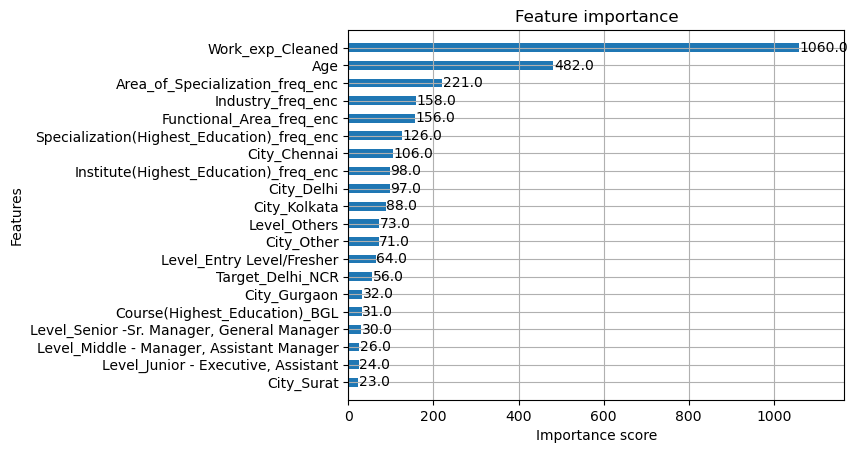

In [225]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot top 20 important features
plot_importance(xgb, max_num_features=20, height=0.5)
plt.show()


#### XGB gave the best perfomance out of the three- It's Highest R² explains ~24% of salary variance and Lowest RMSE explains ~6.32 lakhs average error in salary. 


#### The above plot also give the top 20 most important features as well.

| Model              | Validation R² | Validation RMSE | Test R² | Test RMSE |
|--------------------|---------------|-----------------|---------|-----------|
| **RidgeCV**        | 0.1558        | 7.68            | 0.2127  | 6.43      |
| **Random Forest**  | 0.118        | 7.75            | 0.193  | 6.505      |
| **XGBoost**        | **0.1683**    | **7.53**        | **0.2388** | **6.32** |


## Problem Statement 2 - Predicting Location Preference

### Linear Mode - logistic Regression

In [121]:
X = df.drop(['Target_Delhi_NCR',], axis=1, errors='ignore')
y = df['Target_Delhi_NCR']

In [123]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [135]:
#Addressing the issue of Class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [136]:
pipe_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)

pipe_lr.fit(X_train_bal, y_train_bal)

y_val_pred_lr = pipe_lr.predict(X_val)
y_val_probs_lr = pipe_lr.predict_proba(X_val)[:, 1]

In [137]:
print("----- Logistic Regression (Validation) -----")
print(classification_report(y_val, y_val_pred_lr))
print("Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print("ROC AUC:", roc_auc_score(y_val, y_val_probs_lr))

----- Logistic Regression (Validation) -----
              precision    recall  f1-score   support

           0       0.78      0.82      0.80    118405
           1       0.62      0.55      0.58     62620

    accuracy                           0.73    181025
   macro avg       0.70      0.69      0.69    181025
weighted avg       0.72      0.73      0.72    181025

Accuracy: 0.7266841596464577
ROC AUC: 0.7555735866743977


#### Predicting on Test Data

In [126]:
X_test = df2.drop(columns=['Target_Delhi_NCR'], axis=1)
y_test = df2['Target_Delhi_NCR']

In [140]:
X_test_bal, y_test_bal = smote.fit_resample(X_train, y_train)

In [141]:
y_test_pred = pipe_lr.predict(X_test)
y_test_probs = pipe_lr.predict_proba(X_test)[:, 1]

In [142]:
print("----- Logistic Regression (Test) -----")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_probs))


----- Logistic Regression (Test) -----
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     26000
           1       0.00      0.10      0.00        42

    accuracy                           0.82     26042
   macro avg       0.50      0.46      0.45     26042
weighted avg       1.00      0.82      0.90     26042

Confusion Matrix:
[[21241  4759]
 [   38     4]]
Accuracy: 0.8157975577912603
ROC AUC: 0.49809340659340656


### Tree Model - Random Forest Classifier

In [144]:
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train_bal, y_train_bal)

# Validation predictions
y_val_pred_rf = rf_clf.predict(X_val)
y_val_probs_rf = rf_clf.predict_proba(X_val)[:, 1]

# Test predictions
y_test_pred_rf = rf_clf.predict(X_test)
y_test_probs_rf = rf_clf.predict_proba(X_test)[:, 1]


In [145]:
# --- Metrics (Validation) ---
print("----- Random Forest (Validation) -----")
print(classification_report(y_val, y_val_pred_rf))
print("ROC AUC:", roc_auc_score(y_val, y_val_probs_rf))

# --- Metrics (Test) ---
print("\n----- Random Forest (Test) -----")
print(classification_report(y_test, y_test_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_test_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_test_probs_rf))

----- Random Forest (Validation) -----
              precision    recall  f1-score   support

           0       0.78      0.91      0.84    118405
           1       0.75      0.51      0.60     62620

    accuracy                           0.77    181025
   macro avg       0.76      0.71      0.72    181025
weighted avg       0.77      0.77      0.76    181025

ROC AUC: 0.8032759198702666

----- Random Forest (Test) -----
              precision    recall  f1-score   support

           0       1.00      0.37      0.54     26000
           1       0.00      0.76      0.00        42

    accuracy                           0.37     26042
   macro avg       0.50      0.57      0.27     26042
weighted avg       1.00      0.37      0.54     26042

Confusion Matrix:
 [[ 9646 16354]
 [   10    32]]
Accuracy: 0.37163044313032795
ROC AUC: 0.53675


### XGBoost Classifier

In [147]:
n_class_0 = np.sum(y_train == 0)
n_class_1 = np.sum(y_train == 1)

scale_pos_weight = n_class_0 / n_class_1
print("scale_pos_weight:", scale_pos_weight)

scale_pos_weight: 1.8799950680725313


In [148]:
xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,  # imbalance handling
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, ...)

In [149]:
y_val_pred_xgb = xgb_clf.predict(X_val)
y_val_probs_xgb = xgb_clf.predict_proba(X_val)[:, 1]

# Predict on test
y_test_pred_xgb = xgb_clf.predict(X_test)
y_test_probs_xgb = xgb_clf.predict_proba(X_test)[:, 1]

In [150]:
print("----- XGBoost (Validation) -----")
print(classification_report(y_val, y_val_pred_xgb))
print("ROC AUC:", roc_auc_score(y_val, y_val_probs_xgb))

print("\n----- XGBoost (Test) -----")
print(classification_report(y_test, y_test_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_test_probs_xgb))


----- XGBoost (Validation) -----
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    118405
           1       0.60      0.63      0.62     62620

    accuracy                           0.73    181025
   macro avg       0.70      0.71      0.70    181025
weighted avg       0.73      0.73      0.73    181025

ROC AUC: 0.7896691853773268

----- XGBoost (Test) -----
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     26000
           1       0.00      0.17      0.00        42

    accuracy                           0.82     26042
   macro avg       0.50      0.50      0.45     26042
weighted avg       1.00      0.82      0.90     26042

Confusion Matrix:
 [[21413  4587]
 [   35     7]]
Accuracy: 0.8225174717763613
ROC AUC: 0.5443315018315018


#### Hyper parameter tuning the XGBBoost

In [155]:
scale_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
# Param grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [scale_ratio]  # fixed
}

# Base model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Random search
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=25,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1
)

# Fit on training
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=1.8799950680725313, subsample=0.8; total time=  13.9s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=1.8799950680725313, subsample=0.8; total time=   7.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=10, n_estimators=100, scale_pos_weight=1.8799950680725313, subsample=0.8; total time=   6.8s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=4, n_estimators=200, scale_pos_weight=1.8799950680725313, subsample=0.6; total time=  11.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=4, n_estimators=200, scale_pos_weight=1.8799950680725313, subsample=0.6; total time=   8.9s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=4, n_estimators=200, scale_pos_weight=1.8799950680725313, subsample=0.6; total time=  10.5s
[CV] END colsample_bytre

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=-1,
                                           num_parallel_tree=None, ...),
                   n_iter=25, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300],
                                        'scale_pos_weight': [1.8799950680725313],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [156]:
# Best model from search
best_xgb = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)

# Validation predictions
y_val_pred = best_xgb.predict(X_val)
y_val_probs = best_xgb.predict_proba(X_val)[:, 1]

# Test predictions
y_test_pred = best_xgb.predict(X_test)
y_test_probs = best_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print("----- Tuned XGBoost (Validation) -----")
print(classification_report(y_val, y_val_pred))
print("ROC AUC:", roc_auc_score(y_val, y_val_probs))

print("\n----- Tuned XGBoost (Test) -----")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("ROC AUC:", roc_auc_score(y_test, y_test_probs))


Best Parameters:
 {'subsample': 1.0, 'scale_pos_weight': 1.8799950680725313, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
----- Tuned XGBoost (Validation) -----
              precision    recall  f1-score   support

           0       0.81      0.80      0.81    118405
           1       0.63      0.64      0.64     62620

    accuracy                           0.75    181025
   macro avg       0.72      0.72      0.72    181025
weighted avg       0.75      0.75      0.75    181025

ROC AUC: 0.8084869709252025

----- Tuned XGBoost (Test) -----
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     26000
           1       0.00      0.19      0.00        42

    accuracy                           0.79     26042
   macro avg       0.50      0.49      0.44     26042
weighted avg       1.00      0.79      0.88     26042

Confusion Matrix:
 [[20642  5358]
 [   34     8]]
Accuracy: 0.7929498502419169
ROC A

##### The best performing model with good recall is tuned XGBoost